### Installer les bibliothèques nécessaires

In [1]:
!pip install -q contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 16.7 MB/s eta 0:00:00


### Importer les bibliothèques

In [6]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from datetime import datetime, timedelta
import calendar

# Configuration pour afficher les graphiques dans le notebook
%matplotlib inline
plt.style.use('ggplot')

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Charger les données

In [3]:
df_injection = pd.read_csv('/content/drive/MyDrive/Regional flex/Data/Raw/injections-regionales-quotidiennes-consolidees-rpt.csv', sep=';')
df_injection.head()

Date  Code INSEE région                      Région  \
0  2022-02-01                 75          Nouvelle-Aquitaine   
1  2022-02-01                 75          Nouvelle-Aquitaine   
2  2022-02-01                 76                   Occitanie   
3  2022-02-01                 76                   Occitanie   
4  2022-02-01                 93  Provence-Alpes-Côte d'Azur   

                      Filière                              Puissance maximale  \
0                     Solaire  Supérieure à 1MW et Inférieure ou égale à 12MW   
1  Thermique non renouvelable                       Inférieure ou égale à 1MW   
2                      Eolien                       Inférieure ou égale à 1MW   
3                      Eolien  Supérieure à 1MW et Inférieure ou égale à 12MW   
4                 Hydraulique                               Supérieure à 12MW   

     00h00    00h30    01h00    01h30    02h00  ...     20h30    21h00  \
0    0.000    0.000    0.000    0.000    0.000  ...     0.000    0.000   
1   15.348   15.348   15.348   15.348   15.348  ...    15.348   15.348   
2   59.848   59.556   59.656   59.928   59.690  ...    50.542   56.236   
3   35.064   34.002   33.904   34.498   34.478  ...    33.122   32.747   
4  378.019  259.565  252.475  164.063  164.305  ...  1036.255  745.626   

     21h30    22h00    22h30    23h00    23h30  Nb points d'injection  \
0    0.000    0.000    0.000    0.000    0.000                     64   
1   15.342   15.348   15.348   15.354   15.354                     12   
2   56.103   57.275   57.129   57.377   57.746                      8   
3   32.515   22.888   24.480   24.054   25.730                     10   
4  555.669  465.565  344.947  343.243  296.170                     91   

   Energie journalière (MWh)     Qualité  
0                   570.4390  Consolidée  
1                   368.3610  Consolidée  
2                  1313.2635  Consolidée  
3                   755.5210  Consolidée  
4                 12492.4845  Consolidée  

[5 rows x 56 columns]

In [4]:
df_soutirage = pd.read_csv('/content/drive/MyDrive/Regional flex/Data/Raw/soutirages-regionaux-quotidiens-consolides-rpt.csv', sep=';')
df_soutirage.head()

Date  Code INSEE région              Région  Secteur activité  \
0  2021-10-01                 75  Nouvelle-Aquitaine  Grande Industrie   
1  2021-10-02                 75  Nouvelle-Aquitaine             Autre   
2  2021-10-02                 75  Nouvelle-Aquitaine             Autre   
3  2021-10-03                 75  Nouvelle-Aquitaine  Grande Industrie   
4  2021-10-05                 75  Nouvelle-Aquitaine  Grande Industrie   

   Code tension raccordement Tension raccordement    00h00    00h30    01h00  \
0                          4                90 kV   29.537   30.253   30.245   
1                          3                63 kV   41.728   42.168   41.878   
2                          4                90 kV   56.368   57.849   57.494   
3                          3                63 kV  103.804  100.295  101.657   
4                          3                63 kV   97.218  100.512  102.836   

     01h30  ...   20h30   21h00   21h30   22h00   22h30   23h00    23h30  \
0   28.982  ...  28.877  28.667  28.116  28.137  29.255  26.862   27.782   
1   41.552  ...  38.653  38.565  38.961  38.980  38.298  38.010   37.464   
2   56.556  ...  46.410  45.775  41.560  40.574  40.900  42.258   41.951   
3  102.197  ...  92.843  91.342  91.867  91.173  90.375  93.613   91.903   
4  100.842  ...  97.537  94.040  95.042  96.593  96.701  95.127  100.198   

   Nb points de soutirage  Energie journalière (MWh)     Qualité  
0                       8                   713.6040  Consolidée  
1                      14                   945.2880  Consolidée  
2                      12                  1173.7610  Consolidée  
3                      18                  2331.2385  Consolidée  
4                      18                  2127.9695  Consolidée  

[5 rows x 57 columns]

In [5]:
postes = pd.read_csv('/content/drive/MyDrive/Regional flex/Data/Raw/poste-source.csv', sep=';', on_bad_lines='skip')
postes.head()

Code commune Nom Commune  Code EPCI  \
0         81023       Barre  200066553   
1         69123        Lyon  200046977   
2         64407   Mouguerre  200067106   
3          9285        Seix  200067940   
4         69149     Oullins  200046977   

                                            Nom EPCI  Code Département  \
0  CC des Monts de Lacaune et de la Montagne du H...                81   
1                                  Métropole de Lyon                69   
2                                  CA du Pays Basque                64   
3                              CC Couserans-Pyrénées                 9   
4                                  Métropole de Lyon                69   

        Nom Département  Code Région            Nom Région  \
0                  Tarn           76             Occitanie   
1                 Rhône           84  Auvergne-Rhône-Alpes   
2  Pyrénées-Atlantiques           75    Nouvelle-Aquitaine   
3                Ariège           76             Occitanie   
4                 Rhône           84  Auvergne-Rhône-Alpes   

                                           Geo Shape  \
0  {"coordinates": [2.797402357574498, 43.7292651...   
1  {"coordinates": [4.844838535809686, 45.7210054...   
2  {"coordinates": [-1.442457687578387, 43.484465...   
3  {"coordinates": [1.204164942767529, 42.8719107...   
4  {"coordinates": [4.819827740581599, 45.7109584...   

                                Geo Point              X             Y  
0  43.729265124909986, 2.7974023575744975  683673.243357  6.292270e+06  
1   45.721005440264726, 4.844838535809686  843488.298478  6.515168e+06  
2   43.48446551037549, -1.442457687578387  340653.785140  6.275153e+06  
3  42.871910786877706, 1.2041649427675292  553123.775593  6.198611e+06  
4    45.71095846953748, 4.819827740581599  841569.061192  6.514007e+06

### Analyse EPCI sur plusieurs régions à la fois

Colonnes disponibles dans le dataframe: ['Code commune', 'Nom Commune', 'Code EPCI', 'Nom EPCI', 'Code Département', 'Nom Département', 'Code Région', 'Nom Région', 'Geo Shape', 'Geo Point', 'X', 'Y']
Colonnes EPCI possibles: ['Code EPCI', 'Nom EPCI']
Colonnes Région possibles: ['Code Région', 'Nom Région']

Informations générales sur le dataframe:
Nombre total de lignes: 1424
Nombre de valeurs uniques pour Code EPCI: 474
Nombre de valeurs uniques pour Code Région: 4

Valeurs manquantes:
Code EPCI: 0 (0.00%)
Code Région: 0 (0.00%)

Analyse des EPCI présents dans plusieurs régions:
Nombre d'EPCI présents dans plusieurs régions: 3
Pourcentage d'EPCI présents dans plusieurs régions: 0.63%

Liste des EPCI présents dans plusieurs régions:
     Code EPCI  nombre_regions
20   200030435               2
81   200040681               2
462  248400251               2

Détail des régions pour chaque EPCI multi-régions:
EPCI 200030435 est présent dans 2 régions: 76, 75
EPCI 200040681 est présent dan

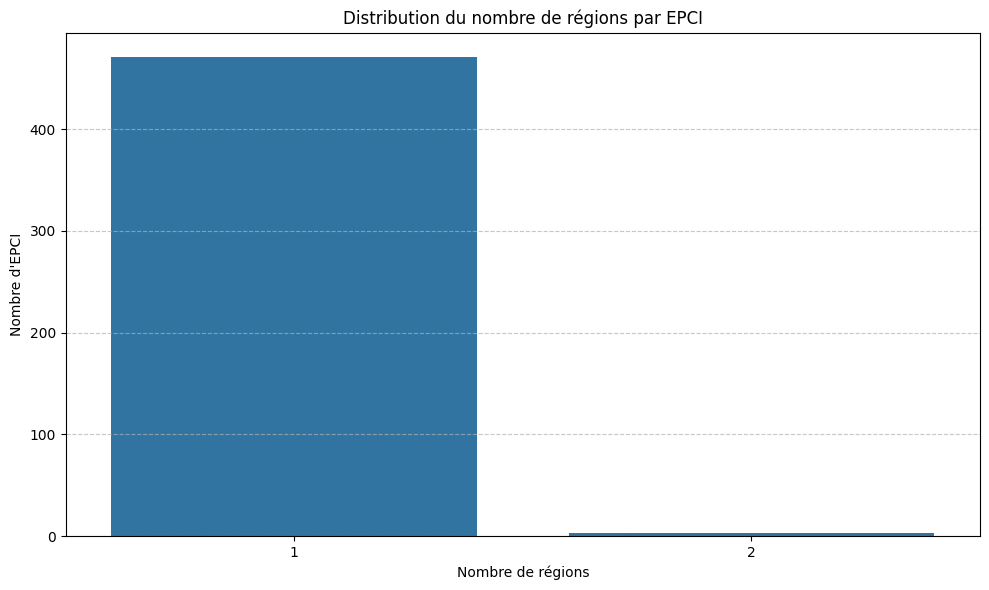


Conclusion: Certains EPCI sont présents dans plusieurs régions administratives.


In [ ]:
# Vérifier les colonnes disponibles
print("Colonnes disponibles dans le dataframe:", postes.columns.tolist())

# Vérifier la présence des colonnes nécessaires
if 'code EPCI' not in postes.columns or 'code Région' not in postes.columns:
    # Adapter les noms des colonnes si nécessaire
    possible_epci_cols = [col for col in postes.columns if 'epci' in col.lower()]
    possible_region_cols = [col for col in postes.columns if 'region' in col.lower() or 'région' in col.lower()]

    print("Colonnes EPCI possibles:", possible_epci_cols)
    print("Colonnes Région possibles:", possible_region_cols)

    # Si des colonnes potentielles sont trouvées, les utiliser
    if possible_epci_cols and possible_region_cols:
        epci_col = possible_epci_cols[0]
        region_col = possible_region_cols[0]
    else:
        raise ValueError("Colonnes code EPCI et/ou code Région non trouvées")
else:
    epci_col = 'code EPCI'
    region_col = 'code Région'

# Informations générales sur le dataframe
print("\nInformations générales sur le dataframe:")
print(f"Nombre total de lignes: {postes.shape[0]}")
print(f"Nombre de valeurs uniques pour {epci_col}: {postes[epci_col].nunique()}")
print(f"Nombre de valeurs uniques pour {region_col}: {postes[region_col].nunique()}")

# Vérifier les valeurs manquantes
print("\nValeurs manquantes:")
print(f"{epci_col}: {postes[epci_col].isna().sum()} ({postes[epci_col].isna().mean():.2%})")
print(f"{region_col}: {postes[region_col].isna().sum()} ({postes[region_col].isna().mean():.2%})")

# Créer un dataframe qui groupe par EPCI et compte le nombre de régions différentes
epci_regions = postes.groupby(epci_col)[region_col].nunique().reset_index(name='nombre_regions')

# Identifier les EPCI présents dans plusieurs régions
multi_region_epci = epci_regions[epci_regions['nombre_regions'] > 1]

# Afficher les résultats
print("\nAnalyse des EPCI présents dans plusieurs régions:")
print(f"Nombre d'EPCI présents dans plusieurs régions: {len(multi_region_epci)}")
print(f"Pourcentage d'EPCI présents dans plusieurs régions: {len(multi_region_epci) / postes[epci_col].nunique():.2%}")

# Si des EPCI sont présents dans plusieurs régions, afficher les détails
if not multi_region_epci.empty:
    print("\nListe des EPCI présents dans plusieurs régions:")
    print(multi_region_epci)

    # Pour chaque EPCI dans plusieurs régions, afficher les régions concernées
    print("\nDétail des régions pour chaque EPCI multi-régions:")
    for epci in multi_region_epci[epci_col]:
        regions = postes[postes[epci_col] == epci][region_col].unique()
        print(f"EPCI {epci} est présent dans {len(regions)} régions: {', '.join(map(str, regions))}")

    # Visualisation: distribution du nombre de régions par EPCI
    plt.figure(figsize=(10, 6))
    sns.countplot(x='nombre_regions', data=epci_regions)
    plt.title('Distribution du nombre de régions par EPCI')
    plt.xlabel('Nombre de régions')
    plt.ylabel('Nombre d\'EPCI')
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("\nAucun EPCI n'est présent dans plusieurs régions.")

# Conclusion
if multi_region_epci.empty:
    print("\nConclusion: Tous les EPCI sont contenus dans une seule région administrative.")
else:
    print("\nConclusion: Certains EPCI sont présents dans plusieurs régions administratives.")


In [ ]:
# Liste des EPCI multi-régions identifiés
epci_multi_regions = [200030435, 200040681, 248400251]  # Convertis en entiers

print("Analyse détaillée des EPCI présents dans plusieurs régions :\n")

for epci_code in epci_multi_regions:
    # Filtrer les données pour cet EPCI
    epci_data = postes[postes['Code EPCI'] == epci_code]  # Maintenant la comparaison fonctionne

    print(f"---- EPCI {epci_code} ----")

    # Vérifier si l'EPCI existe dans les données
    if epci_data.empty:
        print(f"AUCUNE DONNÉE TROUVÉE pour cet EPCI dans le dataframe")
        continue

    # Nombre total de postes source dans cet EPCI
    nb_postes = len(epci_data)
    print(f"Nombre total de postes source : {nb_postes}")

    # Informations sur les régions
    regions_info = epci_data.groupby('Code Région').size().reset_index(name='Nombre de postes')
    print("Répartition par région :")
    print(regions_info)

    # Afficher les régions uniques pour cet EPCI
    regions = epci_data['Code Région'].unique()
    print(f"Régions concernées : {', '.join(map(str, regions))}")

    # Récupérer les noms des régions si disponibles
    if 'Nom Région' in epci_data.columns:
        region_names = {}
        for region in regions:
            region_data = epci_data[epci_data['Code Région'] == region]
            if not region_data.empty and 'Nom Région' in region_data.columns:
                region_name = region_data['Nom Région'].iloc[0]
                if not pd.isna(region_name):
                    region_names[region] = region_name

        if region_names:
            print("\nNoms des régions :")
            for code, name in region_names.items():
                print(f"Région {code} : {name}")

    # Récupérer le nom de l'EPCI si disponible
    if 'Nom EPCI' in epci_data.columns:
        epci_name = epci_data['Nom EPCI'].iloc[0] if not epci_data.empty else None
        if epci_name and not pd.isna(epci_name):
            print(f"\nNom de l'EPCI : {epci_name}")

    # Afficher les départements si disponibles
    if 'Code Département' in epci_data.columns:
        departements = epci_data[['Code Département', 'Code Région']].drop_duplicates()
        print("\nDépartements par région :")
        for _, row in departements.iterrows():
            dept_code = row['Code Département']
            region_code = row['Code Région']
            print(f"- Département {dept_code} dans la région {region_code}")

    print("\n" + "="*50 + "\n")

# Synthèse sur les EPCI multi-régions
print("Synthèse sur les EPCI multi-régions trouvés :")
for epci_code in epci_multi_regions:
    epci_data = postes[postes['Code EPCI'] == epci_code]
    if not epci_data.empty:
        regions = epci_data['Code Région'].unique()
        region_str = ', '.join(map(str, regions))

        if 'Nom EPCI' in epci_data.columns and not epci_data['Nom EPCI'].empty:
            epci_name = epci_data['Nom EPCI'].iloc[0]
            if not pd.isna(epci_name):
                print(f"EPCI {epci_code} ({epci_name}) est présent dans {len(regions)} régions : {region_str}")
            else:
                print(f"EPCI {epci_code} est présent dans {len(regions)} régions : {region_str}")
        else:
            print(f"EPCI {epci_code} est présent dans {len(regions)} régions : {region_str}")


Analyse détaillée des EPCI présents dans plusieurs régions :

---- EPCI 200030435 ----
Nombre total de postes source : 3
Répartition par région :
   Code Région  Nombre de postes
0           75                 1
1           76                 2
Régions concernées : 76, 75

Noms des régions :
Région 76 : Occitanie
Région 75 : Nouvelle-Aquitaine

Nom de l'EPCI : CC d'Aire-sur-l'Adour

Départements par région :
- Département 32 dans la région 76
- Département 40 dans la région 75


---- EPCI 200040681 ----
Nombre total de postes source : 2
Répartition par région :
   Code Région  Nombre de postes
0           84                 1
1           93                 1
Régions concernées : 84, 93

Noms des régions :
Région 84 : Auvergne-Rhône-Alpes
Région 93 : Provence-Alpes-Côte d'Azur

Nom de l'EPCI : CC Enclave des Papes-Pays de Grignan

Départements par région :
- Département 26 dans la région 84
- Département 84 dans la région 93


---- EPCI 248400251 ----
Nombre total de postes source : 6
R

### Visualiser la répartition géographique des postes sources Enedis

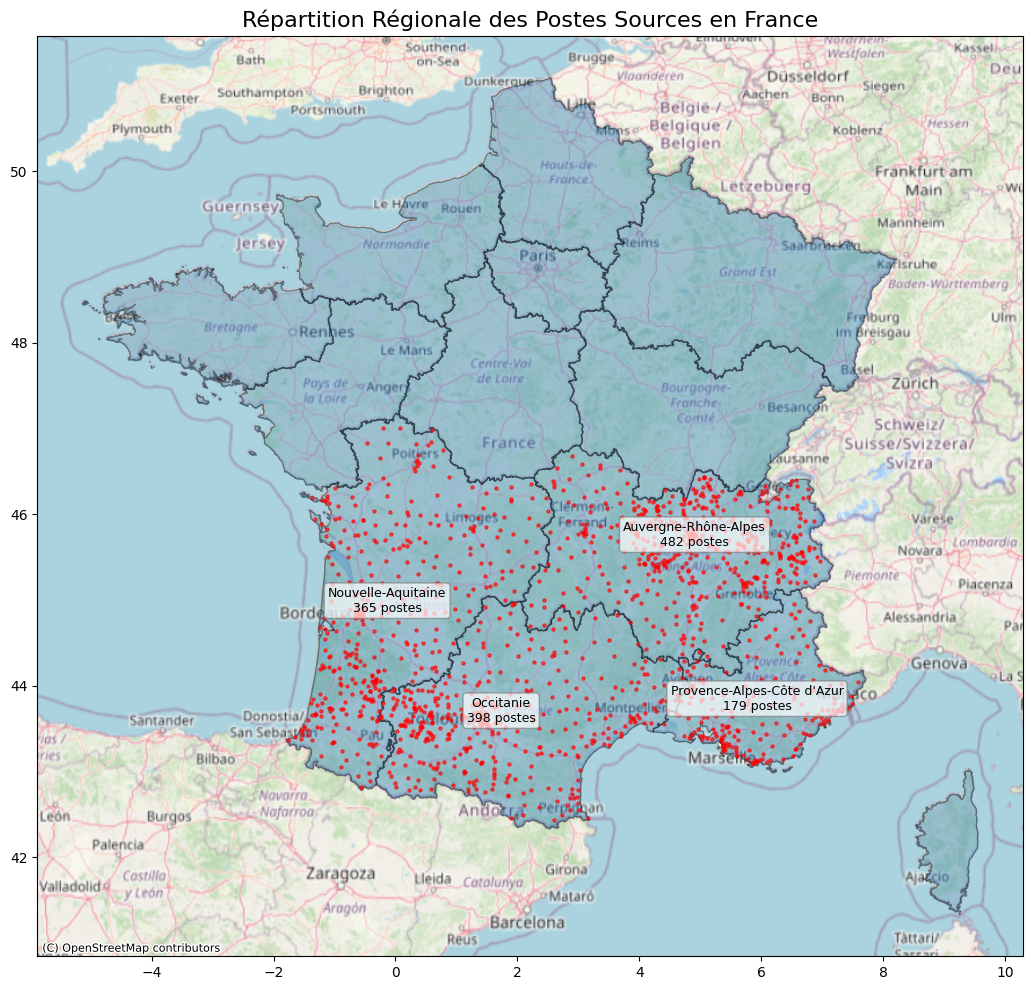

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point
import pandas as pd
import numpy as np
import io
import requests

# Préparation des données de postes
data = postes

# Convertir colonnes X et Y en numérique si ce n'est pas déjà fait
data['X'] = pd.to_numeric(data['X'], errors='coerce')
data['Y'] = pd.to_numeric(data['Y'], errors='coerce')

# Télécharger les limites administratives des régions françaises
url = "https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/regions.geojson"
response = requests.get(url)
regions_fr = gpd.read_file(io.StringIO(response.content.decode('utf-8')))

# Créer un GeoDataFrame à partir des données de postes
geometry = [Point(xy) for xy in zip(data['X'], data['Y'])]
gdf_postes = gpd.GeoDataFrame(data, geometry=geometry)

# Vérifier et corriger le système de coordonnées - choisir le système approprié
# Les X et Y sont probablement en Lambert 93 (EPSG:2154)
gdf_postes.crs = "EPSG:2154"
regions_fr.crs = "EPSG:4326"  # WGS84

# Transformer vers le même système de coordonnées
gdf_postes = gdf_postes.to_crs("EPSG:4326")  # Convertir en WGS84 pour la carte

# Agréger les données par région pour obtenir le nombre total de postes par région
region_counts = data.groupby('Nom Région').size().reset_index(name='Nombre de Postes')

# Création de la carte
fig, ax = plt.subplots(figsize=(12, 10))

# Afficher la couche de fond (régions françaises)
regions_fr.plot(ax=ax, alpha=0.4, edgecolor='black')

# Afficher les points représentant les postes sources
gdf_postes.plot(ax=ax, markersize=5, color='red', alpha=0.6)

# Ajouter les annotations pour chaque région
for idx, row in region_counts.iterrows():
    region_name = row['Nom Région']
    count = row['Nombre de Postes']

    # Trouver le centre approximatif de la région pour placer l'annotation
    region_postes = gdf_postes[gdf_postes['Nom Région'] == region_name]
    if not region_postes.empty:
        centroid_x = region_postes.geometry.x.mean()
        centroid_y = region_postes.geometry.y.mean()
        ax.annotate(f"{region_name}\n{count} postes",
                   xy=(centroid_x, centroid_y),
                   xytext=(0, 0),
                   textcoords="offset points",
                   bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.7),
                   ha='center', fontsize=9)

# Ajouter un fond de carte OpenStreetMap
try:
    ctx.add_basemap(ax, crs=regions_fr.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
except:
    print("Impossible d'ajouter le fond de carte OpenStreetMap")

# Paramètres de la carte
ax.set_title("Répartition Régionale des Postes Sources en France", fontsize=16)
plt.tight_layout()

# Alternative si la première approche ne fonctionne pas
if 'geometry' not in gdf_postes.columns or gdf_postes.empty:
    # Approche alternative avec un graphique à bulles classique
    plt.figure(figsize=(10, 10))
    # Créer une nouvelle figure sans fond de carte
    fig, ax = plt.subplots(figsize=(12, 10))

    # Utiliser les coordonnées moyennes pour chaque région
    region_data = data.groupby('Nom Région')[['X', 'Y']].mean().reset_index()
    region_data = pd.merge(region_counts, region_data, on='Nom Région')

    # Filtrer les lignes avec des coordonnées valides
    region_data = region_data.dropna(subset=['X', 'Y'])

    # Afficher les bulles
    scatter = ax.scatter(region_data['X'], region_data['Y'],
                         s=region_data['Nombre de Postes'] * 5,
                         alpha=0.6, edgecolor='k')

    # Ajouter les annotations
    for idx, row in region_data.iterrows():
        ax.annotate(f"{row['Nom Région']}\n{row['Nombre de Postes']} postes",
                    xy=(row['X'], row['Y']),
                    xytext=(5, 5),
                    textcoords="offset points",
                    fontsize=9,
                    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.7))

    ax.set_title("Distribution des Postes Sources par Région (Vue Schématique)", fontsize=16)
    ax.set_xlabel("Coordonnée X (Lambert 93)")
    ax.set_ylabel("Coordonnée Y (Lambert 93)")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()

plt.savefig("carte_distribution_postes_sources.png", dpi=300, bbox_inches='tight')
plt.show()


### Inspecter les series temporelles d'injection et de soutirage (RTE)

In [ ]:
# Fonction pour charger les données
def charger_donnees(fichier_soutirage, fichier_injection):
    # Chargement des données
    df_soutirage = pd.read_csv(fichier_soutirage, sep=';')  # Ajustez le séparateur selon votre fichier
    df_injection = pd.read_csv(fichier_injection, sep=';')  # Ajustez le séparateur selon votre fichier

    return df_soutirage, df_injection

# Fonction pour vérifier les valeurs négatives
def analyser_valeurs_negatives(df, colonnes_demi_horaires, nom_dataset):
    # Création d'une liste pour stocker les résultats
    resultats = []

    # Analyse des colonnes des demi-heures
    for colonne in colonnes_demi_horaires:
        # Vérifier si la colonne contient des valeurs négatives
        nb_valeurs_negatives = (df[colonne] < 0).sum()
        if nb_valeurs_negatives > 0:
            resultats.append({
                'dataset': nom_dataset,
                'colonne': colonne,
                'nb_valeurs_negatives': nb_valeurs_negatives,
                'min_valeur': df[colonne].min(),
                'exemples': df.loc[df[colonne] < 0, ['Date', 'Région', colonne]].head(3).to_dict('records')
            })

    return resultats

# Fonction pour analyser les patterns d'alternance entre injection et soutirage
def analyser_alternance_injection_soutirage(df_soutirage, df_injection, colonnes_demi_horaires):
    # Cette fonction est une approximation puisque nous n'avons pas d'identifiants uniques de postes
    # Nous allons analyser par région
    regions = df_soutirage['Région'].unique()
    resultats = []

    for region in regions:
        # Données pour la région spécifique
        soutirage_region = df_soutirage[df_soutirage['Région'] == region]
        injection_region = df_injection[df_injection['Région'] == region]

        # Joindre les données par date
        dates_communes = set(soutirage_region['Date']) & set(injection_region['Date'])

        for date in dates_communes:
            soutirage_jour = soutirage_region[soutirage_region['Date'] == date]
            injection_jour = injection_region[injection_region['Date'] == date]

            # Analyser pour chaque demi-heure s'il y a à la fois injection et soutirage
            for colonne in colonnes_demi_horaires:
                # Si les deux valeurs sont significativement non-nulles
                if soutirage_jour[colonne].sum() > 0.1 and injection_jour[colonne].sum() > 0.1:
                    resultats.append({
                        'region': region,
                        'date': date,
                        'heure': colonne,
                        'soutirage': soutirage_jour[colonne].sum(),
                        'injection': injection_jour[colonne].sum()
                    })

    return pd.DataFrame(resultats)

# Fonction pour visualiser une journée spécifique avec Plotly
def visualiser_journee_plotly(df_soutirage, df_injection, date, region, colonnes_demi_horaires):
    soutirage_jour = df_soutirage[(df_soutirage['Date'] == date) & (df_soutirage['Région'] == region)]
    injection_jour = df_injection[(df_injection['Date'] == date) & (df_injection['Région'] == region)]

    # Préparer les données pour le graphique
    heures = [h.replace('h', ':') for h in colonnes_demi_horaires]
    soutirage_valeurs = []
    injection_valeurs = []

    for col in colonnes_demi_horaires:
        soutirage_valeurs.append(soutirage_jour[col].sum())
        injection_valeurs.append(injection_jour[col].sum())

    # Créer le graphique avec Plotly
    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=heures,
        y=soutirage_valeurs,
        name='Soutirage',
        line=dict(color='blue', width=2),
        hovertemplate='%{x}<br>Soutirage: %{y:.2f} MWh'
    ))

    fig.add_trace(go.Scatter(
        x=heures,
        y=injection_valeurs,
        name='Injection',
        line=dict(color='red', width=2),
        hovertemplate='%{x}<br>Injection: %{y:.2f} MWh'
    ))

    fig.update_layout(
        title=f"Soutirage et injection pour {region} le {date}",
        xaxis_title="Heure",
        yaxis_title="Énergie (MWh)",
        legend_title="Type",
        hovermode="x unified",
        template="plotly_white",
        height=500,
        width=900
    )

    # Ajout d'une ligne zéro pour référence
    fig.add_shape(
        type="line",
        x0=heures[0],
        y0=0,
        x1=heures[-1],
        y1=0,
        line=dict(color="black", width=1, dash="dash")
    )

    return fig

# Fonction pour visualiser plusieurs journées avec Plotly
def visualiser_multiples_journees_plotly(df_soutirage, df_injection, resultats_alternance, colonnes_demi_horaires, n=3):
    """Visualise les n premières journées où il y a alternance"""
    figures = []

    if len(resultats_alternance) > 0:
        # Sélectionner les n premières dates/régions uniques
        dates_regions = resultats_alternance[['date', 'region']].drop_duplicates().head(n)

        # Pour chaque date/région, créer un graphique
        for _, row in dates_regions.iterrows():
            fig = visualiser_journee_plotly(df_soutirage, df_injection, row['date'], row['region'], colonnes_demi_horaires)
            figures.append(fig)
            fig.show()

    return figures

# Fonction pour créer des graphiques sur les valeurs négatives avec Plotly
def visualiser_valeurs_negatives_plotly(resultats_negatifs, titre):
    if not resultats_negatifs:
        print(f"Aucune valeur négative trouvée dans {titre.lower()}")
        return None

    # Préparation des données
    df_neg = pd.DataFrame(resultats_negatifs)

    # Créer un graphique à barres
    fig = px.bar(
        df_neg,
        x='colonne',
        y='nb_valeurs_negatives',
        hover_data=['min_valeur'],
        color='min_valeur',
        labels={
            'colonne': 'Heure',
            'nb_valeurs_negatives': 'Nombre de valeurs négatives',
            'min_valeur': 'Valeur minimale'
        },
        title=f"{titre} - Valeurs négatives par heure",
        color_continuous_scale='Reds_r'
    )

    fig.update_layout(
        xaxis_title="Heure de la journée",
        yaxis_title="Nombre de valeurs négatives",
        template="plotly_white",
        height=500,
        width=900
    )

    return fig

# Fonction pour visualiser les alternances avec Plotly
def visualiser_alternance_plotly(resultats_alternance):
    if resultats_alternance.empty:
        print("Aucune période avec à la fois injection et soutirage significatifs.")
        return None, None

    # Répartition des alternances par région
    fig_regions = px.bar(
        resultats_alternance['region'].value_counts().reset_index(),
        x='region',
        y='count',
        color='count',
        labels={
            'region': 'Région',
            'count': 'Nombre de périodes'
        },
        title='Nombre de périodes avec alternance injection/soutirage par région',
        color_continuous_scale='Viridis'
    )

    fig_regions.update_layout(
        xaxis_title="Région",
        yaxis_title="Nombre de périodes",
        template="plotly_white",
        height=500,
        width=900
    )

    # Répartition des alternances par heure
    fig_heures = px.bar(
        resultats_alternance['heure'].value_counts().sort_index().reset_index(),
        x='heure',
        y='count',
        color='count',
        labels={
            'heure': 'Heure',
            'count': 'Nombre de périodes'
        },
        title='Alternance injection/soutirage par heure de la journée',
        color_continuous_scale='Viridis'
    )

    fig_heures.update_layout(
        xaxis_title="Heure",
        yaxis_title="Nombre de périodes",
        template="plotly_white",
        height=500,
        width=900
    )

    return fig_regions, fig_heures

# Fonction pour créer une carte de chaleur des alternances avec Plotly
def visualiser_heatmap_alternance_plotly(resultats_alternance):
    if resultats_alternance.empty:
        return None

    # Préparer les données pour la carte de chaleur
    pivot_data = pd.pivot_table(
        resultats_alternance,
        values='soutirage',  # On peut aussi utiliser 'injection'
        index='region',
        columns='heure',
        aggfunc='count',
        fill_value=0
    )

    # Créer la carte de chaleur
    fig = px.imshow(
        pivot_data,
        labels=dict(x="Heure", y="Région", color="Nombre de périodes"),
        x=pivot_data.columns,
        y=pivot_data.index,
        color_continuous_scale='Viridis',
        title='Carte de chaleur: Alternance injection/soutirage par région et heure'
    )

    fig.update_layout(
        xaxis_title="Heure de la journée",
        yaxis_title="Région",
        template="plotly_white",
        height=600,
        width=1000
    )

    return fig

# Fonction principale avec Plotly
def analyse_complete_plotly(fichier_soutirage, fichier_injection):
    # Charger les données
    df_soutirage, df_injection = charger_donnees(fichier_soutirage, fichier_injection)

    # Identifier les colonnes des demi-heures
    colonnes_demi_horaires = [col for col in df_soutirage.columns if col in
                            ['00h00', '00h30', '01h00', '01h30', '02h00', '02h30',
                              '03h00', '03h30', '04h00', '04h30', '05h00', '05h30',
                              '06h00', '06h30', '07h00', '07h30', '08h00', '08h30',
                              '09h00', '09h30', '10h00', '10h30', '11h00', '11h30',
                              '12h00', '12h30', '13h00', '13h30', '14h00', '14h30',
                              '15h00', '15h30', '16h00', '16h30', '17h00', '17h30',
                              '18h00', '18h30', '19h00', '19h30', '20h00', '20h30',
                              '21h00', '21h30', '22h00', '22h30', '23h00', '23h30']]

    # Analyse des valeurs négatives
    resultats_negatifs_soutirage = analyser_valeurs_negatives(df_soutirage, colonnes_demi_horaires, "Soutirage")
    resultats_negatifs_injection = analyser_valeurs_negatives(df_injection, colonnes_demi_horaires, "Injection")

    # Analyse de l'alternance injection/soutirage
    resultats_alternance = analyser_alternance_injection_soutirage(df_soutirage, df_injection, colonnes_demi_horaires)

    # Afficher les résultats textuels
    print("Résumé des valeurs négatives trouvées dans le soutirage:")
    if resultats_negatifs_soutirage:
        for resultat in resultats_negatifs_soutirage:
            print(f"Colonne {resultat['colonne']}: {resultat['nb_valeurs_negatives']} valeurs négatives, minimum: {resultat['min_valeur']}")
    else:
        print("Aucune valeur négative trouvée dans le soutirage.")

    print("\nRésumé des valeurs négatives trouvées dans l'injection:")
    if resultats_negatifs_injection:
        for resultat in resultats_negatifs_injection:
            print(f"Colonne {resultat['colonne']}: {resultat['nb_valeurs_negatives']} valeurs négatives, minimum: {resultat['min_valeur']}")
    else:
        print("Aucune valeur négative trouvée dans l'injection.")

    print("\nAnalyse de l'alternance injection/soutirage par région et par jour:")
    if not resultats_alternance.empty:
        print(f"Nombre de périodes avec à la fois injection et soutirage: {len(resultats_alternance)}")
        display(resultats_alternance.head())
    else:
        print("Aucune période avec à la fois injection et soutirage significatifs.")

    # Visualisations avec Plotly
    print("\n--- Visualisations interactives ---")

    # 1. Visualisation des valeurs négatives
    if resultats_negatifs_soutirage:
        print("\nGraphique des valeurs négatives dans le soutirage:")
        fig_neg_soutirage = visualiser_valeurs_negatives_plotly(resultats_negatifs_soutirage, "Soutirage")
        if fig_neg_soutirage:
            fig_neg_soutirage.show()

    if resultats_negatifs_injection:
        print("\nGraphique des valeurs négatives dans l'injection:")
        fig_neg_injection = visualiser_valeurs_negatives_plotly(resultats_negatifs_injection, "Injection")
        if fig_neg_injection:
            fig_neg_injection.show()

    # 2. Visualisation des alternances
    if not resultats_alternance.empty:
        print("\nGraphiques des alternances injection/soutirage:")
        fig_regions, fig_heures = visualiser_alternance_plotly(resultats_alternance)
        if fig_regions and fig_heures:
            fig_regions.show()
            fig_heures.show()

        # 3. Carte de chaleur des alternances
        print("\nCarte de chaleur des alternances:")
        fig_heatmap = visualiser_heatmap_alternance_plotly(resultats_alternance)
        if fig_heatmap:
            fig_heatmap.show()

        # 4. Visualisation des journées spécifiques
        print("\nVisualisations des premières journées avec alternance:")
        figures_journees = visualiser_multiples_journees_plotly(
            df_soutirage, df_injection, resultats_alternance, colonnes_demi_horaires, n=3
        )

    return {
        'soutirage_negatif': resultats_negatifs_soutirage,
        'injection_negative': resultats_negatifs_injection,
        'alternance': resultats_alternance
    }


def analyser_profils_journaliers_regionaux(df_soutirage, df_injection):
    """
    Analyse les profils journaliers typiques de soutirage et d'injection par région.

    Args:
        df_soutirage (DataFrame): Données de soutirage
        df_injection (DataFrame): Données d'injection

    Returns:
        dict: Dictionnaire contenant les figures Plotly générées
    """
    print("Analyse des profils journaliers typiques par région...")
    figures = {}

    # Conversion des dates
    df_soutirage['Date'] = pd.to_datetime(df_soutirage['Date'])
    df_injection['Date'] = pd.to_datetime(df_injection['Date'])

    # Identifier les colonnes des demi-heures
    colonnes_demi_horaires = [col for col in df_soutirage.columns if 'h' in col and col[0].isdigit()]

    # Ajouter des informations temporelles
    df_soutirage['Jour_semaine'] = df_soutirage['Date'].dt.day_name()
    df_soutirage['Mois'] = df_soutirage['Date'].dt.month
    df_soutirage['Trimestre'] = df_soutirage['Date'].dt.quarter
    df_soutirage['Weekend'] = df_soutirage['Date'].dt.dayofweek >= 5  # 5=samedi, 6=dimanche

    df_injection['Jour_semaine'] = df_injection['Date'].dt.day_name()
    df_injection['Mois'] = df_injection['Date'].dt.month
    df_injection['Trimestre'] = df_injection['Date'].dt.quarter
    df_injection['Weekend'] = df_injection['Date'].dt.dayofweek >= 5

    # Identifier les régions
    regions = sorted(df_soutirage['Région'].unique())

    # Logique pour différents profils (jours de semaine vs weekend, saisons)
    periodes = [
        {"nom": "Jour ouvré", "filtre": lambda df: ~df['Weekend']},
        {"nom": "Weekend", "filtre": lambda df: df['Weekend']},
        {"nom": "Printemps", "filtre": lambda df: df['Mois'].isin([3, 4, 5])},
        {"nom": "Été", "filtre": lambda df: df['Mois'].isin([6, 7, 8])},
        {"nom": "Automne", "filtre": lambda df: df['Mois'].isin([9, 10, 11])},
        {"nom": "Hiver", "filtre": lambda df: df['Mois'].isin([12, 1, 2])}
    ]

    # 1. Créer des profils journaliers moyens par région pour différentes périodes
    for periode in periodes:
        # Filtrer les données selon la période
        soutirage_periode = df_soutirage[periode["filtre"](df_soutirage)]
        injection_periode = df_injection[periode["filtre"](df_injection)]

        # Vérifier si nous avons assez de données pour cette période
        if len(soutirage_periode) < 1 or len(injection_periode) < 1:
            print(f"Pas assez de données pour la période: {periode['nom']}")
            continue

        # Calculer les moyennes pour chaque heure et région
        profils_soutirage = {}
        profils_injection = {}

        for region in regions:
            soutirage_region = soutirage_periode[soutirage_periode['Région'] == region]
            injection_region = injection_periode[injection_periode['Région'] == region]

            # Calculer les moyennes pour chaque heure
            profil_soutirage_region = []
            profil_injection_region = []

            for col in colonnes_demi_horaires:
                profil_soutirage_region.append(soutirage_region[col].mean())
                profil_injection_region.append(injection_region[col].mean())

            profils_soutirage[region] = profil_soutirage_region
            profils_injection[region] = profil_injection_region

        # Créer un graphique combinant toutes les régions pour le soutirage
        fig_soutirage = go.Figure()

        for region in regions:
            fig_soutirage.add_trace(go.Scatter(
                x=colonnes_demi_horaires,
                y=profils_soutirage[region],
                mode='lines+markers',
                name=f'{region}',
                marker=dict(size=5),
                line=dict(width=2)
            ))

        fig_soutirage.update_layout(
            title=f"Profil journalier moyen de soutirage par région - {periode['nom']}",
            xaxis_title="Heure",
            yaxis_title="Énergie moyenne (MWh)",
            legend_title="Région",
            hovermode="x unified",
            template="plotly_white",
            height=500,
            width=900
        )

        # Créer un graphique combinant toutes les régions pour l'injection
        fig_injection = go.Figure()

        for region in regions:
            fig_injection.add_trace(go.Scatter(
                x=colonnes_demi_horaires,
                y=profils_injection[region],
                mode='lines+markers',
                name=f'{region}',
                marker=dict(size=5),
                line=dict(width=2)
            ))

        fig_injection.update_layout(
            title=f"Profil journalier moyen d'injection par région - {periode['nom']}",
            xaxis_title="Heure",
            yaxis_title="Énergie moyenne (MWh)",
            legend_title="Région",
            hovermode="x unified",
            template="plotly_white",
            height=500,
            width=900
        )

        # Stocker les figures
        figures[f"soutirage_{periode['nom']}"] = fig_soutirage
        figures[f"injection_{periode['nom']}"] = fig_injection

        # Afficher les graphiques
        fig_soutirage.show()
        fig_injection.show()

        # 2. Créer un graphique combiné (soutirage et injection) pour chaque région
        fig_combine = make_subplots(rows=2, cols=1,
                                  subplot_titles=(f"Soutirage - {periode['nom']}",
                                                f"Injection - {periode['nom']}"),
                                  vertical_spacing=0.15)

        for i, region in enumerate(regions):
            fig_combine.add_trace(
                go.Scatter(
                    x=colonnes_demi_horaires,
                    y=profils_soutirage[region],
                    mode='lines',
                    name=f'Soutirage - {region}',
                    line=dict(width=2)
                ),
                row=1, col=1
            )

            fig_combine.add_trace(
                go.Scatter(
                    x=colonnes_demi_horaires,
                    y=profils_injection[region],
                    mode='lines',
                    name=f'Injection - {region}',
                    line=dict(width=2, dash='dash')
                ),
                row=2, col=1
            )

        fig_combine.update_layout(
            title=f"Profils journaliers moyens par région - {periode['nom']}",
            height=800,
            width=1000,
            template="plotly_white",
            legend=dict(orientation="h", yanchor="bottom", y=-0.3, xanchor="center", x=0.5)
        )

        fig_combine.update_xaxes(title_text="Heure", row=1, col=1)
        fig_combine.update_xaxes(title_text="Heure", row=2, col=1)
        fig_combine.update_yaxes(title_text="Soutirage moyen (MWh)", row=1, col=1)
        fig_combine.update_yaxes(title_text="Injection moyenne (MWh)", row=2, col=1)

        # Stocker la figure combinée
        figures[f"combine_{periode['nom']}"] = fig_combine

        # Afficher le graphique combiné
        fig_combine.show()

    # 3. Identifier et visualiser des journées spécifiques intéressantes
    # Journée avec le soutirage maximal
    max_soutirage_sum = 0
    max_soutirage_date = None

    for index, row in df_soutirage.iterrows():
        jour_sum = sum([row[col] for col in colonnes_demi_horaires])
        if jour_sum > max_soutirage_sum:
            max_soutirage_sum = jour_sum
            max_soutirage_date = row['Date']
            max_soutirage_region = row['Région']

    # Journée avec l'injection maximale
    max_injection_sum = 0
    max_injection_date = None

    for index, row in df_injection.iterrows():
        jour_sum = sum([row[col] for col in colonnes_demi_horaires])
        if jour_sum > max_injection_sum:
            max_injection_sum = jour_sum
            max_injection_date = row['Date']
            max_injection_region = row['Région']

    print(f"Journée avec soutirage maximal: {max_soutirage_date} pour la région {max_soutirage_region}")
    print(f"Journée avec injection maximale: {max_injection_date} pour la région {max_injection_region}")

    # Visualiser ces journées spécifiques
    if max_soutirage_date:
        fig_max_soutirage = visualiser_journee_comparaison_regions(
            df_soutirage, max_soutirage_date.strftime('%Y-%m-%d'), "soutirage", colonnes_demi_horaires, regions)
        figures["max_soutirage"] = fig_max_soutirage
        fig_max_soutirage.show()

    if max_injection_date:
        fig_max_injection = visualiser_journee_comparaison_regions(
            df_injection, max_injection_date.strftime('%Y-%m-%d'), "injection", colonnes_demi_horaires, regions)
        figures["max_injection"] = fig_max_injection
        fig_max_injection.show()

    # 4. Analyse des jours typiques par mois
    # Sélectionner un jour représentatif pour chaque mois (médiane des moyennes quotidiennes)
    mois_presentes = sorted(df_soutirage['Mois'].unique())

    for mois in mois_presentes:
        nom_mois = calendar.month_name[mois]

        # Filtrer pour le mois concerné
        soutirage_mois = df_soutirage[df_soutirage['Mois'] == mois]
        injection_mois = df_injection[df_injection['Mois'] == mois]

        # Calculer la somme quotidienne pour chaque date et région
        somme_quotidienne = {}
        for region in regions:
            soutirage_region = soutirage_mois[soutirage_mois['Région'] == region]
            somme_quotidienne[region] = []

            for date in soutirage_region['Date'].dt.date.unique():
                soutirage_jour = soutirage_region[soutirage_region['Date'].dt.date == date]
                somme_jour = sum([soutirage_jour[col].sum() for col in colonnes_demi_horaires])
                somme_quotidienne[region].append((date, somme_jour))

        # Sélectionner la journée médiane pour chaque région
        dates_medianes = {}
        for region in regions:
            if region in somme_quotidienne and somme_quotidienne[region]:
                somme_quotidienne[region].sort(key=lambda x: x[1])
                idx_median = len(somme_quotidienne[region]) // 2
                dates_medianes[region] = somme_quotidienne[region][idx_median][0]

        # Visualiser le jour médian pour le mois
        if dates_medianes:
            # Prendre une date médiane commune (par exemple, celle de la première région)
            date_mediane = list(dates_medianes.values())[0]

            fig_soutirage_mois = visualiser_journee_comparaison_regions(
                df_soutirage, date_mediane.strftime('%Y-%m-%d'), f"soutirage - {nom_mois}",
                colonnes_demi_horaires, regions)

            fig_injection_mois = visualiser_journee_comparaison_regions(
                df_injection, date_mediane.strftime('%Y-%m-%d'), f"injection - {nom_mois}",
                colonnes_demi_horaires, regions)

            figures[f"soutirage_mois_{mois}"] = fig_soutirage_mois
            figures[f"injection_mois_{mois}"] = fig_injection_mois

            fig_soutirage_mois.show()
            fig_injection_mois.show()

    return figures

def visualiser_journee_comparaison_regions(df, date, type_energie, colonnes_demi_horaires, regions):
    """
    Crée un graphique comparant toutes les régions pour une journée spécifique.

    Args:
        df (DataFrame): Données de soutirage ou injection
        date (str): Date au format 'YYYY-MM-DD'
        type_energie (str): Type d'énergie ('soutirage' ou 'injection')
        colonnes_demi_horaires (list): Liste des colonnes représentant les demi-heures
        regions (list): Liste des régions à comparer

    Returns:
        plotly.graph_objects.Figure: Figure Plotly générée
    """
    # Convertir la date si nécessaire
    if isinstance(df['Date'].iloc[0], str):
        df['Date'] = pd.to_datetime(df['Date'])

    # Filtrer pour la date spécifique
    df_jour = df[df['Date'].dt.strftime('%Y-%m-%d') == date]

    # Créer le graphique
    fig = go.Figure()

    for region in regions:
        df_region = df_jour[df_jour['Région'] == region]

        if len(df_region) > 0:
            valeurs = []
            for col in colonnes_demi_horaires:
                valeurs.append(df_region[col].sum())

            fig.add_trace(go.Scatter(
                x=colonnes_demi_horaires,
                y=valeurs,
                mode='lines+markers',
                name=region,
                marker=dict(size=5),
                line=dict(width=2)
            ))

    # Formater la date pour l'affichage
    date_obj = datetime.strptime(date, '%Y-%m-%d')
    date_formatee = date_obj.strftime('%d %B %Y')

    fig.update_layout(
        title=f"Comparaison du {type_energie} entre régions - {date_formatee}",
        xaxis_title="Heure",
        yaxis_title=f"Énergie ({type_energie}) (MWh)",
        legend_title="Région",
        hovermode="x unified",
        template="plotly_white",
        height=500,
        width=900
    )

    return fig

def analyse_complete_etendue(fichier_soutirage, fichier_injection):
    """
    Fonction principale étendue pour l'analyse des données de soutirage et d'injection.

    Args:
        fichier_soutirage (str): Chemin vers le fichier CSV contenant les données de soutirage
        fichier_injection (str): Chemin vers le fichier CSV contenant les données d'injection

    Returns:
        dict: Résultats de l'analyse
    """
    # Charger les données
    df_soutirage, df_injection = charger_donnees(fichier_soutirage, fichier_injection)

    # Effectuer l'analyse de base
    resultats_base = analyse_complete_plotly(fichier_soutirage, fichier_injection)

    # Effectuer l'analyse approfondie des profils journaliers
    figures_profils = analyser_profils_journaliers_regionaux(df_soutirage, df_injection)

    # Combiner les résultats
    resultats_complets = {
        **resultats_base,
        'figures_profils': figures_profils
    }

    return resultats_complets


In [ ]:
resultats = analyse_complete_etendue('/content/drive/MyDrive/Regional flex/Data/Raw/soutirages-regionaux-quotidiens-consolides-rpt.csv',
                                      '/content/drive/MyDrive/Regional flex/Data/Raw/injections-regionales-quotidiennes-consolidees-rpt.csv')


Résumé des valeurs négatives trouvées dans le soutirage:
Aucune valeur négative trouvée dans le soutirage.

Résumé des valeurs négatives trouvées dans l'injection:
Aucune valeur négative trouvée dans l'injection.

Analyse de l'alternance injection/soutirage par région et par jour:
Nombre de périodes avec à la fois injection et soutirage: 426816


region        date  heure   soutirage  injection
0  Nouvelle-Aquitaine  2025-01-18  00h00  403.430722  7786.0200
1  Nouvelle-Aquitaine  2025-01-18  00h30  436.747812  7789.5345
2  Nouvelle-Aquitaine  2025-01-18  01h00  436.667829  7616.4630
3  Nouvelle-Aquitaine  2025-01-18  01h30  437.401498  7636.0490
4  Nouvelle-Aquitaine  2025-01-18  02h00  433.462804  7517.3970


--- Visualisations interactives ---

Graphiques des alternances injection/soutirage:



Carte de chaleur des alternances:



Visualisations des premières journées avec alternance:


Analyse des profils journaliers typiques par région...


Journée avec soutirage maximal: 2023-09-07 00:00:00 pour la région Provence-Alpes-Côte d'Azur
Journée avec injection maximale: 2023-01-25 00:00:00 pour la région Auvergne-Rhône-Alpes


### Analyse des min max des séries temporelles d'injection / soutirage

In [27]:
def analyser_min_max_temporel_par_region_condense(df_soutirage, df_injection):
    """Version condensée de l'analyse des extremums par région"""
    print("Analyse des minimums et maximums des séries temporelles par région (version condensée)...")

    # Structure pour stocker les résultats
    resultats = {"statistiques": {}, "occurrences": {}, "figures": {}, "tableaux": {}}

    # Conversion des dates si nécessaire
    if not pd.api.types.is_datetime64_any_dtype(df_soutirage['Date']):
        df_soutirage['Date'] = pd.to_datetime(df_soutirage['Date'])
    if not pd.api.types.is_datetime64_any_dtype(df_injection['Date']):
        df_injection['Date'] = pd.to_datetime(df_injection['Date'])

    # Identifier les colonnes des demi-heures
    colonnes_demi_horaires = [col for col in df_soutirage.columns if 'h' in col and col[0].isdigit()]

    # Ajouter informations temporelles
    for df in [df_soutirage, df_injection]:
        df['Jour_semaine'] = df['Date'].dt.day_name()
        df['Jour_semaine_num'] = df['Date'].dt.dayofweek
        df['Mois'] = df['Date'].dt.month
        df['Mois_nom'] = df['Date'].dt.month.apply(lambda x: calendar.month_name[x])
        df['Année'] = df['Date'].dt.year
        df['Trimestre'] = df['Date'].dt.quarter
        df['Semaine'] = df['Date'].dt.isocalendar().week
        df['Weekend'] = df['Jour_semaine_num'].isin([5, 6])  # 5=samedi, 6=dimanche

    # Identifier les régions
    regions = sorted(df_soutirage['Région'].unique())

    # 1. ANALYSE DES MIN/MAX PAR RÉGION
    # ---------------------------------

    # Structure pour stocker les min/max par région
    extremums_absolus = {region: {
        "soutirage": {"min": None, "max": None},
        "injection": {"min": None, "max": None}
    } for region in regions}

    # Trouver les extremums absolus pour chaque région
    for region in regions:
        print(f"\nAnalyse des extremums pour la région: {region}...")

        # Sous-ensemble pour la région
        soutirage_region = df_soutirage[df_soutirage['Région'] == region]
        injection_region = df_injection[df_injection['Région'] == region]

        # Trouver les extremums absolus (globaux) pour chaque région
        # Soutirage min global
        if not soutirage_region.empty:
            min_global_soutirage = float('inf')
            max_global_soutirage = float('-inf')
            min_details_soutirage = None
            max_details_soutirage = None

            for col in colonnes_demi_horaires:
                min_val = soutirage_region[col].min()
                if min_val < min_global_soutirage:
                    min_global_soutirage = min_val
                    min_idx = soutirage_region[col].idxmin()
                    row = soutirage_region.loc[min_idx]
                    min_details_soutirage = {
                        "valeur": min_val,
                        "date": row['Date'],
                        "heure": col,
                        "details": {
                            "jour_semaine": row['Jour_semaine'],
                            "mois": row['Mois'],
                            "mois_nom": row['Mois_nom'],
                            "weekend": row['Weekend']
                        }
                    }

                max_val = soutirage_region[col].max()
                if max_val > max_global_soutirage:
                    max_global_soutirage = max_val
                    max_idx = soutirage_region[col].idxmax()
                    row = soutirage_region.loc[max_idx]
                    max_details_soutirage = {
                        "valeur": max_val,
                        "date": row['Date'],
                        "heure": col,
                        "details": {
                            "jour_semaine": row['Jour_semaine'],
                            "mois": row['Mois'],
                            "mois_nom": row['Mois_nom'],
                            "weekend": row['Weekend']
                        }
                    }

            extremums_absolus[region]["soutirage"]["min"] = min_details_soutirage
            extremums_absolus[region]["soutirage"]["max"] = max_details_soutirage

        # Injection min/max global
        if not injection_region.empty:
            min_global_injection = float('inf')
            max_global_injection = float('-inf')
            min_details_injection = None
            max_details_injection = None

            for col in colonnes_demi_horaires:
                min_val = injection_region[col].min()
                if min_val < min_global_injection:
                    min_global_injection = min_val
                    min_idx = injection_region[col].idxmin()
                    row = injection_region.loc[min_idx]
                    min_details_injection = {
                        "valeur": min_val,
                        "date": row['Date'],
                        "heure": col,
                        "details": {
                            "jour_semaine": row['Jour_semaine'],
                            "mois": row['Mois'],
                            "mois_nom": row['Mois_nom'],
                            "weekend": row['Weekend']
                        }
                    }

                max_val = injection_region[col].max()
                if max_val > max_global_injection:
                    max_global_injection = max_val
                    max_idx = injection_region[col].idxmax()
                    row = injection_region.loc[max_idx]
                    max_details_injection = {
                        "valeur": max_val,
                        "date": row['Date'],
                        "heure": col,
                        "details": {
                            "jour_semaine": row['Jour_semaine'],
                            "mois": row['Mois'],
                            "mois_nom": row['Mois_nom'],
                            "weekend": row['Weekend']
                        }
                    }

            extremums_absolus[region]["injection"]["min"] = min_details_injection
            extremums_absolus[region]["injection"]["max"] = max_details_injection

    # Structure pour stocker les occurrences d'extremums par région
    occurrences_par_region = {region: {
        "soutirage": {
            "min": {"heure": {}, "jour_semaine": {}, "mois": {}, "weekend": {}},
            "max": {"heure": {}, "jour_semaine": {}, "mois": {}, "weekend": {}}
        },
        "injection": {
            "min": {"heure": {}, "jour_semaine": {}, "mois": {}, "weekend": {}},
            "max": {"heure": {}, "jour_semaine": {}, "mois": {}, "weekend": {}}
        }
    } for region in regions}

    # Initialiser les compteurs pour chaque région
    for region in regions:
        for type_energie in ["soutirage", "injection"]:
            for extreme in ["min", "max"]:
                # Par heure
                for col in colonnes_demi_horaires:
                    occurrences_par_region[region][type_energie][extreme]["heure"][col] = 0

                # Par jour de la semaine
                for jour in range(7):
                    occurrences_par_region[region][type_energie][extreme]["jour_semaine"][jour] = 0

                # Par mois
                for mois in range(1, 13):
                    occurrences_par_region[region][type_energie][extreme]["mois"][mois] = 0

                # Par weekend
                for weekend in [True, False]:
                    occurrences_par_region[region][type_energie][extreme]["weekend"][weekend] = 0

    # Compter les occurrences pour chaque région et type d'énergie
    for region in regions:
        # Compter pour le soutirage
        soutirage_region = df_soutirage[df_soutirage['Région'] == region]

        # Pour chaque colonne (demi-heure)
        for col in colonnes_demi_horaires:
            if not soutirage_region.empty:
                # Trouver l'indice du minimum
                idx_min = soutirage_region[col].idxmin()
                if idx_min is not None:
                    # Récupérer les informations de la ligne
                    row_min = soutirage_region.loc[idx_min]

                    # Incrémenter les compteurs
                    occurrences_par_region[region]["soutirage"]["min"]["heure"][col] += 1
                    occurrences_par_region[region]["soutirage"]["min"]["jour_semaine"][row_min['Jour_semaine_num']] += 1
                    occurrences_par_region[region]["soutirage"]["min"]["mois"][row_min['Mois']] += 1
                    occurrences_par_region[region]["soutirage"]["min"]["weekend"][row_min['Weekend']] += 1

                # Trouver l'indice du maximum
                idx_max = soutirage_region[col].idxmax()
                if idx_max is not None:
                    # Récupérer les informations de la ligne
                    row_max = soutirage_region.loc[idx_max]

                    # Incrémenter les compteurs
                    occurrences_par_region[region]["soutirage"]["max"]["heure"][col] += 1
                    occurrences_par_region[region]["soutirage"]["max"]["jour_semaine"][row_max['Jour_semaine_num']] += 1
                    occurrences_par_region[region]["soutirage"]["max"]["mois"][row_max['Mois']] += 1
                    occurrences_par_region[region]["soutirage"]["max"]["weekend"][row_max['Weekend']] += 1

        # Compter pour l'injection
        injection_region = df_injection[df_injection['Région'] == region]

        # Pour chaque colonne (demi-heure)
        for col in colonnes_demi_horaires:
            if not injection_region.empty:
                # Trouver l'indice du minimum
                idx_min = injection_region[col].idxmin()
                if idx_min is not None:
                    # Récupérer les informations de la ligne
                    row_min = injection_region.loc[idx_min]

                    # Incrémenter les compteurs
                    occurrences_par_region[region]["injection"]["min"]["heure"][col] += 1
                    occurrences_par_region[region]["injection"]["min"]["jour_semaine"][row_min['Jour_semaine_num']] += 1
                    occurrences_par_region[region]["injection"]["min"]["mois"][row_min['Mois']] += 1
                    occurrences_par_region[region]["injection"]["min"]["weekend"][row_min['Weekend']] += 1

                # Trouver l'indice du maximum
                idx_max = injection_region[col].idxmax()
                if idx_max is not None:
                    # Récupérer les informations de la ligne
                    row_max = injection_region.loc[idx_max]

                    # Incrémenter les compteurs
                    occurrences_par_region[region]["injection"]["max"]["heure"][col] += 1
                    occurrences_par_region[region]["injection"]["max"]["jour_semaine"][row_max['Jour_semaine_num']] += 1
                    occurrences_par_region[region]["injection"]["max"]["mois"][row_max['Mois']] += 1
                    occurrences_par_region[region]["injection"]["max"]["weekend"][row_max['Weekend']] += 1

    # Stocker les résultats
    resultats["occurrences"] = occurrences_par_region
    resultats["statistiques"]["extremums_absolus"] = extremums_absolus

    # Pour chaque région, créer un tableau des top heures, jours, mois pour les extremums
    tableaux_resume = {region: {} for region in regions}

    for region in regions:
        # Top 3 heures avec le plus d'occurrences de minimums/maximums
        for type_energie in ["soutirage", "injection"]:
            for extreme in ["min", "max"]:
                prefix = f"{type_energie}_{extreme}"

                # Top heures
                heures = occurrences_par_region[region][type_energie][extreme]["heure"]
                top_heures = sorted(heures.items(), key=lambda x: x[1], reverse=True)[:3]
                tableaux_resume[region][f"{prefix}_top_heures"] = [
                    {"heure": h, "occurrences": o} for h, o in top_heures
                ]

                # Top jours
                jours = occurrences_par_region[region][type_energie][extreme]["jour_semaine"]
                top_jours = sorted(jours.items(), key=lambda x: x[1], reverse=True)[:3]
                tableaux_resume[region][f"{prefix}_top_jours"] = [
                    {"jour": calendar.day_name[j], "occurrences": o} for j, o in top_jours
                ]

                # Top mois
                mois = occurrences_par_region[region][type_energie][extreme]["mois"]
                top_mois = sorted(mois.items(), key=lambda x: x[1], reverse=True)[:3]
                tableaux_resume[region][f"{prefix}_top_mois"] = [
                    {"mois": calendar.month_name[m], "occurrences": o} for m, o in top_mois
                ]

    # Stocker les tableaux résumés
    resultats["tableaux"]["resume"] = tableaux_resume

    # Visualisations condensées
    for region in regions:
        # 1. GRAPHIQUE COMBINÉ: Distribution des extremums par heure et par type d'énergie
        fig = go.Figure()

        # Tri des heures chronologiquement
        heures_triees = sorted(colonnes_demi_horaires,
                              key=lambda h: (int(h.split('h')[0]), 30 if 'h30' in h else 0))

        # Tracer les 4 séries sur le même graphique (soutirage min/max, injection min/max)
        fig.add_trace(go.Bar(
            x=heures_triees,
            y=[occurrences_par_region[region]["soutirage"]["min"]["heure"][h] for h in heures_triees],
            name="Soutirage Min",
            marker_color="rgba(0, 0, 255, 0.6)",
            width=0.2,
            offset=-0.3
        ))

        fig.add_trace(go.Bar(
            x=heures_triees,
            y=[occurrences_par_region[region]["soutirage"]["max"]["heure"][h] for h in heures_triees],
            name="Soutirage Max",
            marker_color="rgba(255, 0, 0, 0.6)",
            width=0.2,
            offset=-0.1
        ))

        fig.add_trace(go.Bar(
            x=heures_triees,
            y=[occurrences_par_region[region]["injection"]["min"]["heure"][h] for h in heures_triees],
            name="Injection Min",
            marker_color="rgba(0, 0, 255, 0.9)",
            width=0.2,
            offset=0.1
        ))

        fig.add_trace(go.Bar(
            x=heures_triees,
            y=[occurrences_par_region[region]["injection"]["max"]["heure"][h] for h in heures_triees],
            name="Injection Max",
            marker_color="rgba(255, 0, 0, 0.9)",
            width=0.2,
            offset=0.3
        ))

        fig.update_layout(
            title=f"{region} - Distribution des extremums par heure de la journée",
            xaxis_title="Heure",
            yaxis_title="Nombre d'occurrences",
            barmode='group',
            template="plotly_white",
            height=500,
            legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
        )

        resultats["figures"][f"{region}_distribution_heure_combinee"] = fig
        fig.show()

        # 2. GRAPHIQUE COMBINÉ: Distribution par jour de la semaine et weekend
        fig = go.Figure()

        jours = ["Lundi", "Mardi", "Mercredi", "Jeudi", "Vendredi", "Samedi", "Dimanche"]

        # Créer un subplot avec 4 quadrants
        fig = make_subplots(rows=2, cols=2,
                          subplot_titles=["Soutirage - Jours", "Injection - Jours",
                                         "Soutirage - Weekend", "Injection - Weekend"],
                          vertical_spacing=0.12,
                          horizontal_spacing=0.08)

        # Quadrant 1: Soutirage par jour
        fig.add_trace(go.Bar(
            x=jours,
            y=[occurrences_par_region[region]["soutirage"]["min"]["jour_semaine"][i] for i in range(7)],
            name="Min",
            marker_color="blue",
            showlegend=True
        ), row=1, col=1)

        fig.add_trace(go.Bar(
            x=jours,
            y=[occurrences_par_region[region]["soutirage"]["max"]["jour_semaine"][i] for i in range(7)],
            name="Max",
            marker_color="red",
            showlegend=True
        ), row=1, col=1)

        # Quadrant 2: Injection par jour
        fig.add_trace(go.Bar(
            x=jours,
            y=[occurrences_par_region[region]["injection"]["min"]["jour_semaine"][i] for i in range(7)],
            name="Min",
            marker_color="blue",
            showlegend=False
        ), row=1, col=2)

        fig.add_trace(go.Bar(
            x=jours,
            y=[occurrences_par_region[region]["injection"]["max"]["jour_semaine"][i] for i in range(7)],
            name="Max",
            marker_color="red",
            showlegend=False
        ), row=1, col=2)

        # Quadrant 3: Soutirage weekend vs semaine
        categories = ["Semaine", "Weekend"]
        fig.add_trace(go.Bar(
            x=categories,
            y=[occurrences_par_region[region]["soutirage"]["min"]["weekend"][False],
               occurrences_par_region[region]["soutirage"]["min"]["weekend"][True]],
            name="Min",
            marker_color="blue",
            showlegend=False
        ), row=2, col=1)

        fig.add_trace(go.Bar(
            x=categories,
            y=[occurrences_par_region[region]["soutirage"]["max"]["weekend"][False],
               occurrences_par_region[region]["soutirage"]["max"]["weekend"][True]],
            name="Max",
            marker_color="red",
            showlegend=False
        ), row=2, col=1)

        # Quadrant 4: Injection weekend vs semaine
        fig.add_trace(go.Bar(
            x=categories,
            y=[occurrences_par_region[region]["injection"]["min"]["weekend"][False],
               occurrences_par_region[region]["injection"]["min"]["weekend"][True]],
            name="Min",
            marker_color="blue",
            showlegend=False
        ), row=2, col=2)

        fig.add_trace(go.Bar(
            x=categories,
            y=[occurrences_par_region[region]["injection"]["max"]["weekend"][False],
               occurrences_par_region[region]["injection"]["max"]["weekend"][True]],
            name="Max",
            marker_color="red",
            showlegend=False
        ), row=2, col=2)

        fig.update_layout(
            title_text=f"{region} - Distribution des extremums par jour et par période",
            height=700,
            width=900,
            legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
            template="plotly_white"
        )

        resultats["figures"][f"{region}_distribution_jour_weekend_combinee"] = fig
        fig.show()

        # 3. GRAPHIQUE COMBINÉ: Distribution par mois
        fig = make_subplots(rows=2, cols=2,
                          subplot_titles=["Soutirage - Distribution par mois",
                                         "Injection - Distribution par mois",
                                         "Soutirage - Modèle saisonnier",
                                         "Injection - Modèle saisonnier"],
                          vertical_spacing=0.15,
                          horizontal_spacing=0.08)

        mois_noms = [calendar.month_abbr[i] for i in range(1, 13)]

        # Soutirage par mois
        fig.add_trace(go.Bar(
            x=mois_noms,
            y=[occurrences_par_region[region]["soutirage"]["min"]["mois"].get(m, 0) for m in range(1, 13)],
            name="Min",
            marker_color="blue"
        ), row=1, col=1)

        fig.add_trace(go.Bar(
            x=mois_noms,
            y=[occurrences_par_region[region]["soutirage"]["max"]["mois"].get(m, 0) for m in range(1, 13)],
            name="Max",
            marker_color="red"
        ), row=1, col=1)

        # Injection par mois
        fig.add_trace(go.Bar(
            x=mois_noms,
            y=[occurrences_par_region[region]["injection"]["min"]["mois"].get(m, 0) for m in range(1, 13)],
            name="Min",
            marker_color="blue",
            showlegend=False
        ), row=1, col=2)

        fig.add_trace(go.Bar(
            x=mois_noms,
            y=[occurrences_par_region[region]["injection"]["max"]["mois"].get(m, 0) for m in range(1, 13)],
            name="Max",
            marker_color="red",
            showlegend=False
        ), row=1, col=2)

        # Modèle saisonnier (simplification pour l'exemple)
        # Ces courbes devraient être remplacées par un vrai modèle saisonnier si disponible
        x_mois = list(range(1, 13))

        # Soutirage - modèle saisonnier simulé
        fig.add_trace(go.Scatter(
            x=mois_noms,
            y=[sum(occurrences_par_region[region]["soutirage"]["min"]["mois"].get(m, 0) for m in range(max(1, i-1), min(13, i+2)))/3 for i in x_mois],
            name="Tendance Min",
            line=dict(color="blue", dash="dot")
        ), row=2, col=1)

        fig.add_trace(go.Scatter(
            x=mois_noms,
            y=[sum(occurrences_par_region[region]["soutirage"]["max"]["mois"].get(m, 0) for m in range(max(1, i-1), min(13, i+2)))/3 for i in x_mois],
            name="Tendance Max",
            line=dict(color="red", dash="dot")
        ), row=2, col=1)

        # Injection - modèle saisonnier simulé
        fig.add_trace(go.Scatter(
            x=mois_noms,
            y=[sum(occurrences_par_region[region]["injection"]["min"]["mois"].get(m, 0) for m in range(max(1, i-1), min(13, i+2)))/3 for i in x_mois],
            name="Tendance Min",
            line=dict(color="blue", dash="dot"),
            showlegend=False
        ), row=2, col=2)

        fig.add_trace(go.Scatter(
            x=mois_noms,
            y=[sum(occurrences_par_region[region]["injection"]["max"]["mois"].get(m, 0) for m in range(max(1, i-1), min(13, i+2)))/3 for i in x_mois],
            name="Tendance Max",
            line=dict(color="red", dash="dot"),
            showlegend=False
        ), row=2, col=2)

        fig.update_layout(
            title_text=f"{region} - Analyse mensuelle des extremums",
            height=800,
            width=1000,
            template="plotly_white",
            legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
        )

        resultats["figures"][f"{region}_analyse_mensuelle"] = fig
        fig.show()

        # 4. TABLEAU RÉCAPITULATIF COMPLET
        # Créer un tableau récapitulatif complet pour la région
        recap_df = pd.DataFrame(columns=["Type", "Extremum", "Valeur", "Date/Heure",
                                         "Top Heures", "Top Jours", "Top Mois", "Weekend/Semaine"])

        # Remplir avec les données de soutirage et injection
        for type_energie in ["soutirage", "injection"]:
            for extreme in ["min", "max"]:
                # Obtenir les informations d'extremum absolu
                info = extremums_absolus[region][type_energie][extreme]

                # Obtenir les top périodes
                top_heures = tableaux_resume[region][f"{type_energie}_{extreme}_top_heures"]
                top_heures_str = ", ".join([f"{item['heure']} ({item['occurrences']})" for item in top_heures])

                top_jours = tableaux_resume[region][f"{type_energie}_{extreme}_top_jours"]
                top_jours_str = ", ".join([f"{item['jour']} ({item['occurrences']})" for item in top_jours])

                top_mois = tableaux_resume[region][f"{type_energie}_{extreme}_top_mois"]
                top_mois_str = ", ".join([f"{item['mois']} ({item['occurrences']})" for item in top_mois])

                # Calculer le ratio weekend/semaine
                weekend_count = occurrences_par_region[region][type_energie][extreme]["weekend"][True]
                semaine_count = occurrences_par_region[region][type_energie][extreme]["weekend"][False]
                ratio = f"{weekend_count}/{semaine_count}"

                date_heure = "N/A"
                valeur = "N/A"
                if info and "date" in info and info["date"] is not None:
                    date_heure = f"{info['date'].strftime('%d/%m/%Y')} à {info['heure']}"
                    valeur = f"{info['valeur']:.2f} MWh"

                # Ajouter au DataFrame
                recap_df = pd.concat([recap_df, pd.DataFrame([{
                    "Type": type_energie.capitalize(),
                    "Extremum": extreme.capitalize(),
                    "Valeur": valeur,
                    "Date/Heure": date_heure,
                    "Top Heures": top_heures_str,
                    "Top Jours": top_jours_str,
                    "Top Mois": top_mois_str,
                    "Weekend/Semaine": ratio
                }])], ignore_index=True)

        # Afficher le tableau récapitulatif
        print(f"\n=== Récapitulatif complet pour la région: {region} ===")
        display(recap_df)

        # Stocker le tableau
        resultats["tableaux"][f"recap_{region}"] = recap_df

    return resultats


In [30]:
# Appel de la fonction
resultats_condenses = analyser_min_max_temporel_par_region_condense(df_soutirage, df_injection)

Analyse des minimums et maximums des séries temporelles par région (version condensée)...

Analyse des extremums pour la région: Auvergne-Rhône-Alpes...

Analyse des extremums pour la région: Nouvelle-Aquitaine...

Analyse des extremums pour la région: Occitanie...

Analyse des extremums pour la région: Provence-Alpes-Côte d'Azur...



=== Récapitulatif complet pour la région: Auvergne-Rhône-Alpes ===


Type Extremum        Valeur          Date/Heure  \
0  Soutirage      Min      0.05 MWh  09/04/2024 à 00h30   
1  Soutirage      Max    625.33 MWh  05/07/2024 à 11h30   
2  Injection      Min      0.00 MWh  01/01/2022 à 00h00   
3  Injection      Max  13568.00 MWh  22/01/2023 à 09h00   

                        Top Heures                                  Top Jours  \
0  00h00 (1), 00h30 (1), 01h00 (1)    Tuesday (18), Monday (13), Saturday (5)   
1  00h00 (1), 00h30 (1), 01h00 (1)  Friday (21), Wednesday (11), Saturday (7)   
2  00h00 (1), 00h30 (1), 01h00 (1)   Thursday (35), Saturday (12), Friday (1)   
3  00h00 (1), 00h30 (1), 01h00 (1)    Wednesday (16), Monday (9), Tuesday (8)   

                                Top Mois Weekend/Semaine  
0     May (31), April (5), September (3)            9/39  
1    July (30), June (15), September (2)            8/40  
2      May (35), January (12), March (1)           12/36  
3  January (48), February (0), March (0)            8/40


=== Récapitulatif complet pour la région: Nouvelle-Aquitaine ===


Type Extremum       Valeur          Date/Heure  \
0  Soutirage      Min     0.85 MWh  01/10/2023 à 01h00   
1  Soutirage      Max   230.22 MWh  16/01/2025 à 18h30   
2  Injection      Min     0.00 MWh  01/02/2022 à 00h00   
3  Injection      Max  6777.61 MWh  04/01/2019 à 09h30   

                        Top Heures                                 Top Jours  \
0  00h00 (1), 00h30 (1), 01h00 (1)    Sunday (22), Saturday (14), Monday (7)   
1  00h00 (1), 00h30 (1), 01h00 (1)  Thursday (26), Friday (16), Saturday (6)   
2  00h00 (1), 00h30 (1), 01h00 (1)  Tuesday (28), Monday (20), Wednesday (0)   
3  00h00 (1), 00h30 (1), 01h00 (1)  Saturday (20), Thursday (17), Friday (7)   

                                 Top Mois Weekend/Semaine  
0       April (31), October (11), May (5)           36/12  
1   January (48), February (0), March (0)            6/42  
2  February (28), March (20), January (0)            0/48  
3   January (48), February (0), March (0)           22/26


=== Récapitulatif complet pour la région: Occitanie ===


Type Extremum       Valeur          Date/Heure  \
0  Soutirage      Min     0.02 MWh  26/07/2024 à 01h00   
1  Soutirage      Max   195.80 MWh  09/07/2023 à 13h00   
2  Injection      Min     0.00 MWh  30/04/2022 à 00h00   
3  Injection      Max  3961.56 MWh  26/01/2022 à 08h30   

                        Top Heures                                 Top Jours  \
0  00h00 (1), 00h30 (1), 01h00 (1)    Friday (11), Sunday (11), Tuesday (10)   
1  00h00 (1), 00h30 (1), 01h00 (1)    Sunday (24), Tuesday (7), Thursday (7)   
2  00h00 (1), 00h30 (1), 01h00 (1)  Saturday (46), Wednesday (2), Monday (0)   
3  00h00 (1), 00h30 (1), 01h00 (1)   Friday (14), Tuesday (9), Wednesday (8)   

                                 Top Mois Weekend/Semaine  
0       May (12), November (7), April (5)           19/29  
1         July (35), June (8), August (3)           29/19  
2      April (46), March (2), January (0)            46/2  
3  January (26), March (11), December (6)            6/42


=== Récapitulatif complet pour la région: Provence-Alpes-Côte d'Azur ===


Type Extremum       Valeur          Date/Heure  \
0  Soutirage      Min     1.70 MWh  15/09/2021 à 03h00   
1  Soutirage      Max   969.33 MWh  04/09/2023 à 15h30   
2  Injection      Min     0.00 MWh  01/02/2022 à 00h00   
3  Injection      Max  2463.44 MWh  07/06/2020 à 23h00   

                        Top Heures                                 Top Jours  \
0  00h00 (1), 00h30 (1), 01h00 (1)  Sunday (18), Saturday (12), Thursday (9)   
1  00h00 (1), 00h30 (1), 01h00 (1)  Friday (14), Saturday (14), Thursday (9)   
2  00h00 (1), 00h30 (1), 01h00 (1)     Tuesday (29), Sunday (19), Monday (0)   
3  00h00 (1), 00h30 (1), 01h00 (1)    Friday (17), Saturday (12), Sunday (9)   

                                   Top Mois Weekend/Semaine  
0  April (24), December (17), September (3)           30/18  
1       September (18), May (14), July (10)           16/32  
2    February (29), March (19), January (0)           19/29  
3         February (17), May (13), June (9)           21/27

### Analyse du nombre de points de soutirage et d'injection (RTE) sur les jeux entiers

In [ ]:
# Fonction pour charger les données
def charger_donnees(fichier_soutirage, fichier_injection):
    # Chargement des données
    df_soutirage = pd.read_csv(fichier_soutirage, sep=';') # Ajustez le séparateur selon votre fichier
    df_injection = pd.read_csv(fichier_injection, sep=';') # Ajustez le séparateur selon votre fichier

    # Conversion de la colonne Date en datetime si nécessaire
    df_soutirage['Date'] = pd.to_datetime(df_soutirage['Date'])
    df_injection['Date'] = pd.to_datetime(df_injection['Date'])

    return df_soutirage, df_injection

# Fonction pour calculer le nombre total de points par jour et par région
def calculer_points_par_jour_region(df_soutirage, df_injection):
    # Agrégation des points de soutirage par jour et par région
    soutirage_points = df_soutirage.groupby(['Date', 'Région'])['Nb points de soutirage'].sum().reset_index()
    soutirage_points.rename(columns={'Nb points de soutirage': 'Points de soutirage'}, inplace=True)

    # Agrégation des points d'injection par jour et par région
    injection_points = df_injection.groupby(['Date', 'Région'])['Nb points d\'injection'].sum().reset_index()
    injection_points.rename(columns={'Nb points d\'injection': 'Points d\'injection'}, inplace=True)

    # Fusion des données sur Date et Région
    df_merged = pd.merge(soutirage_points, injection_points, on=['Date', 'Région'], how='outer')

    # Remplacer les NaN par 0
    df_merged.fillna(0, inplace=True)

    # Calculer le total des points
    df_merged['Total points'] = df_merged['Points de soutirage'] + df_merged['Points d\'injection']

    return df_merged

# Fonction pour créer des graphiques interactifs avec Plotly
def creer_graphiques_plotly(df_points):
    # Ajout du jour de semaine pour les futures analyses
    if 'Date' in df_points.columns:
        df_points['Jour de semaine'] = df_points['Date'].dt.day_name()

    # 1. Graphique interactif du nombre total de points par région au fil du temps
    fig1 = go.Figure()

    for region in df_points['Région'].unique():
        subset = df_points[df_points['Région'] == region]
        fig1.add_trace(go.Scatter(
            x=subset['Date'],
            y=subset['Total points'],
            mode='lines',
            name=region,
            hovertemplate='<b>%{x}</b><br>Points totaux: %{y:,.0f}<extra></extra>'
        ))

    fig1.update_layout(
        title='Évolution du nombre total de points (soutirage + injection) par région',
        xaxis_title='Date',
        yaxis_title='Nombre total de points',
        legend_title='Région',
        hovermode='closest',
        template='plotly_white',
        height=600,
        width=1000
    )

    fig1.show()

    # 2. Boxplot interactif du nombre total de points par région
    fig2 = px.box(
        df_points,
        x='Région',
        y='Total points',
        color='Région',
        title='Distribution du nombre total de points par région',
        labels={'Total points': 'Nombre total de points', 'Région': 'Région'},
        height=600,
        width=1000
    )

    fig2.update_layout(
        xaxis_title='Région',
        yaxis_title='Nombre total de points',
        template='plotly_white',
        showlegend=False
    )

    fig2.show()

    # 3. Graphique à barres empilées interactif pour comparer soutirage et injection
    df_points_mean = df_points.groupby('Région').agg({
        'Points de soutirage': 'mean',
        'Points d\'injection': 'mean'
    }).reset_index()

    # Préparation des données pour le graphique à barres empilées
    fig3 = go.Figure()

    fig3.add_trace(go.Bar(
        x=df_points_mean['Région'],
        y=df_points_mean['Points de soutirage'],
        name='Points de soutirage',
        marker_color='royalblue',
        hovertemplate='<b>%{x}</b><br>Points de soutirage: %{y:,.0f}<extra></extra>'
    ))

    fig3.add_trace(go.Bar(
        x=df_points_mean['Région'],
        y=df_points_mean['Points d\'injection'],
        name='Points d\'injection',
        marker_color='firebrick',
        hovertemplate='<b>%{x}</b><br>Points d\'injection: %{y:,.0f}<extra></extra>'
    ))

    fig3.update_layout(
        title='Moyenne quotidienne des points de soutirage et d\'injection par région',
        xaxis_title='Région',
        yaxis_title='Nombre moyen de points',
        barmode='stack',
        legend_title='Type de point',
        template='plotly_white',
        height=600,
        width=1000
    )

    fig3.show()

    # 4. Graphique de la proportion injection vs soutirage
    df_points_mean['Proportion injection (%)'] = (df_points_mean['Points d\'injection'] /
                                                 (df_points_mean['Points de soutirage'] + df_points_mean['Points d\'injection']) * 100)

    fig4 = px.bar(
        df_points_mean,
        x='Région',
        y='Proportion injection (%)',
        color='Proportion injection (%)',
        title='Proportion des points d\'injection dans le total par région',
        labels={'Proportion injection (%)': 'Proportion d\'injection (%)', 'Région': 'Région'},
        color_continuous_scale='Viridis',
        height=600,
        width=1000
    )

    fig4.update_layout(
        xaxis_title='Région',
        yaxis_title='Proportion d\'injection (%)',
        template='plotly_white',
        coloraxis_showscale=False
    )

    fig4.show()

    # 5. Heatmap interactif de la variation hebdomadaire
    if 'Jour de semaine' in df_points.columns:
        heatmap_data = df_points.pivot_table(
            values='Total points',
            index='Région',
            columns='Jour de semaine',
            aggfunc='mean'
        )

        # Réorganiser les jours de la semaine
        jours_ordre = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        heatmap_data = heatmap_data.reindex(columns=[j for j in jours_ordre if j in heatmap_data.columns])

        fig5 = px.imshow(
            heatmap_data,
            x=heatmap_data.columns,
            y=heatmap_data.index,
            labels=dict(x="Jour de semaine", y="Région", color="Nombre de points"),
            color_continuous_scale="YlGnBu",
            title='Moyenne du nombre total de points par jour de semaine et par région',
            text_auto='.0f',
            aspect='auto',
            height=600,
            width=1000
        )

        fig5.update_layout(
            xaxis_title='Jour de semaine',
            yaxis_title='Région',
            template='plotly_white'
        )

        fig5.show()

    # 6. Graphique en ligne du total par jour de la semaine (nouveau graphique)
    if 'Jour de semaine' in df_points.columns:
        jour_semaine_data = df_points.groupby(['Jour de semaine', 'Région']).agg({
            'Total points': 'mean'
        }).reset_index()

        # Définir l'ordre des jours de la semaine
        map_jour = {jour: i for i, jour in enumerate(jours_ordre)}
        jour_semaine_data['jour_ordre'] = jour_semaine_data['Jour de semaine'].map(map_jour)
        jour_semaine_data.sort_values('jour_ordre', inplace=True)

        fig6 = px.line(
            jour_semaine_data,
            x='Jour de semaine',
            y='Total points',
            color='Région',
            title='Moyenne du nombre total de points par jour de semaine et par région',
            labels={'Total points': 'Nombre moyen de points', 'Jour de semaine': 'Jour de la semaine'},
            markers=True,
            height=600,
            width=1000
        )

        fig6.update_layout(
            xaxis={'categoryorder': 'array', 'categoryarray': jours_ordre},
            xaxis_title='Jour de la semaine',
            yaxis_title='Nombre moyen de points',
            template='plotly_white',
            legend_title='Région'
        )

        fig6.show()

    # 7. Graphique interactif de l'évolution des points de soutirage et d'injection (nouveau graphique)
    fig7 = go.Figure()

    for region in df_points['Région'].unique():
        subset = df_points[df_points['Région'] == region]

        # Création de sous-graphique pour chaque région
        fig_region = make_subplots(rows=1, cols=1, subplot_titles=[f"Région: {region}"])

        fig_region.add_trace(
            go.Scatter(
                x=subset['Date'],
                y=subset['Points de soutirage'],
                mode='lines',
                name='Soutirage',
                line=dict(color='royalblue', width=2),
                hovertemplate='<b>%{x}</b><br>Soutirage: %{y:,.0f}<extra></extra>'
            )
        )

        fig_region.add_trace(
            go.Scatter(
                x=subset['Date'],
                y=subset['Points d\'injection'],
                mode='lines',
                name='Injection',
                line=dict(color='firebrick', width=2),
                hovertemplate='<b>%{x}</b><br>Injection: %{y:,.0f}<extra></extra>'
            )
        )

        fig_region.update_layout(
            title=f'Évolution des points de soutirage et d\'injection - {region}',
            xaxis_title='Date',
            yaxis_title='Nombre de points',
            legend_title='Type',
            template='plotly_white',
            height=500,
            width=1000
        )

        fig_region.show()

    # Retourner les figures pour une utilisation ultérieure si nécessaire
    return {
        'evolution_totale': fig1,
        'boxplot': fig2,
        'barres_empilees': fig3,
        'proportion_injection': fig4,
        'heatmap': fig5,
        'ligne_jour_semaine': fig6
    }

# Fonction principale adaptée pour Plotly
def analyse_points_plotly(fichier_soutirage, fichier_injection):
    # Chargement des données
    print("Chargement des données...")
    df_soutirage, df_injection = charger_donnees(fichier_soutirage, fichier_injection)

    # Calcul du nombre de points par jour et par région
    print("Calcul des points par jour et par région...")
    df_points = calculer_points_par_jour_region(df_soutirage, df_injection)

    # Afficher un résumé des résultats
    print("\nRésumé du nombre total de points par région:")
    resume_region = df_points.groupby('Région').agg({
        'Points de soutirage': ['mean', 'min', 'max', 'sum'],
        'Points d\'injection': ['mean', 'min', 'max', 'sum'],
        'Total points': ['mean', 'min', 'max', 'sum']
    })
    display(resume_region.round(2))  # Utilisation de display pour le rendu dans le notebook

    print("\nTop 5 des jours avec le plus grand nombre total de points:")
    display(df_points.sort_values('Total points', ascending=False).head(5))

    # Créer des graphiques interactifs avec Plotly
    print("\nCréation des graphiques interactifs...")
    figures = creer_graphiques_plotly(df_points)

    print("\nAnalyse complète terminée! Les graphiques interactifs ont été affichés ci-dessus.")

    # Retourner le DataFrame et les figures pour d'autres analyses si nécessaire
    return df_points, figures

In [ ]:
df_resultats, figures = analyse_points_plotly('/content/drive/MyDrive/Regional flex/Data/Raw/soutirages-regionaux-quotidiens-consolides-rpt.csv',
                                            '/content/drive/MyDrive/Regional flex/Data/Raw/injections-regionales-quotidiennes-consolidees-rpt.csv')


Chargement des données...
Calcul des points par jour et par région...

Résumé du nombre total de points par région:


Points de soutirage                    \
                                          mean  min  max     sum   
Région                                                             
Auvergne-Rhône-Alpes                    227.73  201  244  506247   
Nouvelle-Aquitaine                      136.26  123  146  302903   
Occitanie                               130.37  128  136  289805   
Provence-Alpes-Côte d'Azur               75.88   72   80  168671   

                           Points d'injection                   Total points  \
                                         mean  min  max     sum         mean   
Région                                                                         
Auvergne-Rhône-Alpes                   242.99  161  317  540172       470.72   
Nouvelle-Aquitaine                     136.88   24  178  304290       273.14   
Occitanie                              197.32  132  273  438644       327.69   
Provence-Alpes-Côte d'Azur             115.88   79  163  257593       191.75   

                                               
                            min  max      sum  
Région                                         
Auvergne-Rhône-Alpes        385  543  1046419  
Nouvelle-Aquitaine          160  315   607193  
Occitanie                   260  403   728449  
Provence-Alpes-Côte d'Azur  155  238   426264


Top 5 des jours avec le plus grand nombre total de points:


Date                Région  Points de soutirage  \
4584 2022-02-20  Auvergne-Rhône-Alpes                  226   
4588 2022-02-21  Auvergne-Rhône-Alpes                  226   
4568 2022-02-16  Auvergne-Rhône-Alpes                  226   
4368 2021-12-28  Auvergne-Rhône-Alpes                  225   
4372 2021-12-29  Auvergne-Rhône-Alpes                  225   

      Points d'injection  Total points  
4584                 317           543  
4588                 317           543  
4568                 317           543  
4368                 317           542  
4372                 317           542


Création des graphiques interactifs...



Analyse complète terminée! Les graphiques interactifs ont été affichés ci-dessus.


### Analyse du nombre de points de soutirage et d'injection (RTE) sur 2024

In [ ]:
# Fonction pour charger les données et filtrer pour 2024 uniquement
def charger_donnees_2024(fichier_soutirage, fichier_injection):
    # Chargement des données
    df_soutirage = pd.read_csv(fichier_soutirage, sep=';') # Ajustez le séparateur selon votre fichier
    df_injection = pd.read_csv(fichier_injection, sep=';') # Ajustez le séparateur selon votre fichier

    # Conversion de la colonne Date en datetime
    df_soutirage['Date'] = pd.to_datetime(df_soutirage['Date'])
    df_injection['Date'] = pd.to_datetime(df_injection['Date'])

    # Filtrer les données pour ne garder que l'année 2024
    df_soutirage_2024 = df_soutirage[df_soutirage['Date'].dt.year == 2024]
    df_injection_2024 = df_injection[df_injection['Date'].dt.year == 2024]

    print(f"Données filtrées pour 2024 uniquement:")
    print(f"  - Soutirage: {len(df_soutirage_2024)} entrées sur {len(df_soutirage)} totales")
    print(f"  - Injection: {len(df_injection_2024)} entrées sur {len(df_injection)} totales")

    return df_soutirage_2024, df_injection_2024

# Fonction pour calculer le nombre total de points par jour et par région
def calculer_points_par_jour_region(df_soutirage, df_injection):
    # Agrégation des points de soutirage par jour et par région
    soutirage_points = df_soutirage.groupby(['Date', 'Région'])['Nb points de soutirage'].sum().reset_index()
    soutirage_points.rename(columns={'Nb points de soutirage': 'Points de soutirage'}, inplace=True)

    # Agrégation des points d'injection par jour et par région
    injection_points = df_injection.groupby(['Date', 'Région'])['Nb points d\'injection'].sum().reset_index()
    injection_points.rename(columns={'Nb points d\'injection': 'Points d\'injection'}, inplace=True)

    # Fusion des données sur Date et Région
    df_merged = pd.merge(soutirage_points, injection_points, on=['Date', 'Région'], how='outer')

    # Remplacer les NaN par 0
    df_merged.fillna(0, inplace=True)

    # Calculer le total des points
    df_merged['Total points'] = df_merged['Points de soutirage'] + df_merged['Points d\'injection']

    return df_merged

# Fonction adaptée pour créer des graphiques interactifs avec Plotly pour 2024
def creer_graphiques_plotly_2024(df_points):
    # Ajout du jour de semaine et du mois pour les analyses
    if 'Date' in df_points.columns:
        df_points['Jour de semaine'] = df_points['Date'].dt.day_name()
        df_points['Mois'] = df_points['Date'].dt.month_name()
        df_points['Semaine'] = df_points['Date'].dt.isocalendar().week

    # 1. Graphique interactif du nombre total de points par région au fil du temps pour 2024
    fig1 = go.Figure()

    for region in df_points['Région'].unique():
        subset = df_points[df_points['Région'] == region]
        fig1.add_trace(go.Scatter(
            x=subset['Date'],
            y=subset['Total points'],
            mode='lines',
            name=region,
            hovertemplate='<b>%{x}</b><br>Points totaux: %{y:,.0f}<extra></extra>'
        ))

    fig1.update_layout(
        title='Évolution du nombre total de points (soutirage + injection) par région en 2024',
        xaxis_title='Date',
        yaxis_title='Nombre total de points',
        legend_title='Région',
        hovermode='closest',
        template='plotly_white',
        height=600,
        width=1000
    )

    fig1.show()

    # 2. Boxplot interactif du nombre total de points par région
    fig2 = px.box(
        df_points,
        x='Région',
        y='Total points',
        color='Région',
        title='Distribution du nombre total de points par région en 2024',
        labels={'Total points': 'Nombre total de points', 'Région': 'Région'},
        height=600,
        width=1000
    )

    fig2.update_layout(
        xaxis_title='Région',
        yaxis_title='Nombre total de points',
        template='plotly_white',
        showlegend=False
    )

    fig2.show()

    # 3. Graphique à barres empilées interactif pour comparer soutirage et injection
    df_points_mean = df_points.groupby('Région').agg({
        'Points de soutirage': 'mean',
        'Points d\'injection': 'mean'
    }).reset_index()

    # Préparation des données pour le graphique à barres empilées
    fig3 = go.Figure()

    fig3.add_trace(go.Bar(
        x=df_points_mean['Région'],
        y=df_points_mean['Points de soutirage'],
        name='Points de soutirage',
        marker_color='royalblue',
        hovertemplate='<b>%{x}</b><br>Points de soutirage: %{y:,.0f}<extra></extra>'
    ))

    fig3.add_trace(go.Bar(
        x=df_points_mean['Région'],
        y=df_points_mean['Points d\'injection'],
        name='Points d\'injection',
        marker_color='firebrick',
        hovertemplate='<b>%{x}</b><br>Points d\'injection: %{y:,.0f}<extra></extra>'
    ))

    fig3.update_layout(
        title='Moyenne quotidienne des points de soutirage et d\'injection par région en 2024',
        xaxis_title='Région',
        yaxis_title='Nombre moyen de points',
        barmode='stack',
        legend_title='Type de point',
        template='plotly_white',
        height=600,
        width=1000
    )

    fig3.show()

    # 4. Graphique de la proportion injection vs soutirage
    df_points_mean['Proportion injection (%)'] = (df_points_mean['Points d\'injection'] /
                                                 (df_points_mean['Points de soutirage'] + df_points_mean['Points d\'injection']) * 100)

    fig4 = px.bar(
        df_points_mean,
        x='Région',
        y='Proportion injection (%)',
        color='Proportion injection (%)',
        title='Proportion des points d\'injection dans le total par région en 2024',
        labels={'Proportion injection (%)': 'Proportion d\'injection (%)', 'Région': 'Région'},
        color_continuous_scale='Viridis',
        height=600,
        width=1000
    )

    fig4.update_layout(
        xaxis_title='Région',
        yaxis_title='Proportion d\'injection (%)',
        template='plotly_white',
        coloraxis_showscale=False
    )

    fig4.show()

    # 5. Heatmap interactif de la variation hebdomadaire
    if 'Jour de semaine' in df_points.columns:
        heatmap_data = df_points.pivot_table(
            values='Total points',
            index='Région',
            columns='Jour de semaine',
            aggfunc='mean'
        )

        # Réorganiser les jours de la semaine
        jours_ordre = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        heatmap_data = heatmap_data.reindex(columns=[j for j in jours_ordre if j in heatmap_data.columns])

        fig5 = px.imshow(
            heatmap_data,
            x=heatmap_data.columns,
            y=heatmap_data.index,
            labels=dict(x="Jour de semaine", y="Région", color="Nombre de points"),
            color_continuous_scale="YlGnBu",
            title='Moyenne du nombre total de points par jour de semaine et par région en 2024',
            text_auto='.0f',
            aspect='auto',
            height=600,
            width=1000
        )

        fig5.update_layout(
            xaxis_title='Jour de semaine',
            yaxis_title='Région',
            template='plotly_white'
        )

        fig5.show()

    # 6. Graphique en ligne du total par jour de la semaine
    if 'Jour de semaine' in df_points.columns:
        jour_semaine_data = df_points.groupby(['Jour de semaine', 'Région']).agg({
            'Total points': 'mean'
        }).reset_index()

        # Définir l'ordre des jours de la semaine
        map_jour = {jour: i for i, jour in enumerate(jours_ordre)}
        jour_semaine_data['jour_ordre'] = jour_semaine_data['Jour de semaine'].map(map_jour)
        jour_semaine_data.sort_values('jour_ordre', inplace=True)

        fig6 = px.line(
            jour_semaine_data,
            x='Jour de semaine',
            y='Total points',
            color='Région',
            title='Moyenne du nombre total de points par jour de semaine et par région en 2024',
            labels={'Total points': 'Nombre moyen de points', 'Jour de semaine': 'Jour de la semaine'},
            markers=True,
            height=600,
            width=1000
        )

        fig6.update_layout(
            xaxis={'categoryorder': 'array', 'categoryarray': jours_ordre},
            xaxis_title='Jour de la semaine',
            yaxis_title='Nombre moyen de points',
            template='plotly_white',
            legend_title='Région'
        )

        fig6.show()

    # 7. Évolution par mois pour 2024 (nouveau graphique spécifique à 2024)
    if 'Mois' in df_points.columns:
        mois_data = df_points.groupby(['Mois', 'Région']).agg({
            'Points de soutirage': 'mean',
            'Points d\'injection': 'mean',
            'Total points': 'mean'
        }).reset_index()

        # Ordre des mois
        mois_ordre = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
        map_mois = {mois: i for i, mois in enumerate(mois_ordre)}
        mois_data['mois_ordre'] = mois_data['Mois'].map(map_mois)
        mois_data.sort_values('mois_ordre', inplace=True)

        fig7 = px.line(
            mois_data,
            x='Mois',
            y='Total points',
            color='Région',
            title='Évolution mensuelle du nombre total de points par région en 2024',
            labels={'Total points': 'Nombre moyen de points', 'Mois': 'Mois'},
            markers=True,
            height=600,
            width=1000
        )

        fig7.update_layout(
            xaxis={'categoryorder': 'array', 'categoryarray': [m for m in mois_ordre if m in mois_data['Mois'].unique()]},
            xaxis_title='Mois',
            yaxis_title='Nombre moyen de points',
            template='plotly_white',
            legend_title='Région'
        )

        fig7.show()

    # 8. Tendance par semaine pour 2024 (nouveau graphique spécifique à 2024)
    if 'Semaine' in df_points.columns:
        semaine_data = df_points.groupby(['Semaine', 'Région']).agg({
            'Total points': 'mean'
        }).reset_index()

        fig8 = px.line(
            semaine_data,
            x='Semaine',
            y='Total points',
            color='Région',
            title='Évolution hebdomadaire du nombre total de points par région en 2024',
            labels={'Total points': 'Nombre moyen de points', 'Semaine': 'Semaine de l\'année'},
            markers=True,
            height=600,
            width=1000
        )

        fig8.update_layout(
            xaxis_title='Semaine de l\'année 2024',
            yaxis_title='Nombre moyen de points',
            template='plotly_white',
            legend_title='Région'
        )

        fig8.show()

    # 9. Graphique interactif détaillé pour chaque région (2024)
    for region in df_points['Région'].unique():
        subset = df_points[df_points['Région'] == region]

        # Création de sous-graphique pour chaque région
        fig_region = make_subplots(rows=1, cols=1, subplot_titles=[f"Région: {region} (2024)"])

        fig_region.add_trace(
            go.Scatter(
                x=subset['Date'],
                y=subset['Points de soutirage'],
                mode='lines',
                name='Soutirage',
                line=dict(color='royalblue', width=2),
                hovertemplate='<b>%{x}</b><br>Soutirage: %{y:,.0f}<extra></extra>'
            )
        )

        fig_region.add_trace(
            go.Scatter(
                x=subset['Date'],
                y=subset['Points d\'injection'],
                mode='lines',
                name='Injection',
                line=dict(color='firebrick', width=2),
                hovertemplate='<b>%{x}</b><br>Injection: %{y:,.0f}<extra></extra>'
            )
        )

        fig_region.update_layout(
            title=f'Évolution des points de soutirage et d\'injection - {region} (2024)',
            xaxis_title='Date',
            yaxis_title='Nombre de points',
            legend_title='Type',
            template='plotly_white',
            height=500,
            width=1000
        )

        fig_region.show()

    # Retourner les figures pour une utilisation ultérieure si nécessaire
    return {
        'evolution_totale': fig1,
        'boxplot': fig2,
        'barres_empilees': fig3,
        'proportion_injection': fig4,
        'heatmap': fig5,
        'ligne_jour_semaine': fig6,
        'evolution_mensuelle': fig7,
        'evolution_hebdomadaire': fig8
    }

# Fonction principale adaptée pour analyser uniquement les données de 2024
def analyse_points_2024(fichier_soutirage, fichier_injection):
    # Chargement des données filtrées pour 2024
    print("Chargement et filtrage des données pour 2024...")
    df_soutirage_2024, df_injection_2024 = charger_donnees_2024(fichier_soutirage, fichier_injection)

    # Vérifier s'il y a des données pour 2024
    if len(df_soutirage_2024) == 0 or len(df_injection_2024) == 0:
        print("⚠️ Attention: Pas ou très peu de données disponibles pour l'année 2024.")
        return None, None

    # Calcul du nombre de points par jour et par région
    print("\nCalcul des points par jour et par région pour 2024...")
    df_points_2024 = calculer_points_par_jour_region(df_soutirage_2024, df_injection_2024)

    # Plage de dates disponibles
    date_min = df_points_2024['Date'].min().strftime('%d/%m/%Y')
    date_max = df_points_2024['Date'].max().strftime('%d/%m/%Y')
    print(f"\nAnalyse des données du {date_min} au {date_max}")

    # Afficher un résumé des résultats
    print("\nRésumé du nombre total de points par région en 2024:")
    resume_region = df_points_2024.groupby('Région').agg({
        'Points de soutirage': ['mean', 'min', 'max', 'sum'],
        'Points d\'injection': ['mean', 'min', 'max', 'sum'],
        'Total points': ['mean', 'min', 'max', 'sum']
    })
    display(resume_region.round(2))  # Utilisation de display pour le rendu dans le notebook

    print("\nTop 5 des jours de 2024 avec le plus grand nombre total de points:")
    display(df_points_2024.sort_values('Total points', ascending=False).head(5)[['Date', 'Région', 'Points de soutirage', 'Points d\'injection', 'Total points']])

    # Statistiques descriptives sur les données de 2024
    print("\nStatistiques descriptives pour les données de 2024:")
    display(df_points_2024[['Points de soutirage', 'Points d\'injection', 'Total points']].describe().round(2))

    # Créer des graphiques interactifs avec Plotly
    print("\nCréation des graphiques interactifs pour l'année 2024...")
    figures = creer_graphiques_plotly_2024(df_points_2024)

    print("\nAnalyse des données de 2024 terminée! Les graphiques interactifs ont été affichés ci-dessus.")

    # Retourner le DataFrame et les figures pour d'autres analyses si nécessaire
    return df_points_2024, figures

In [ ]:
df_resultats_2024, figures_2024 = analyse_points_2024('/content/drive/MyDrive/Regional flex/Data/Raw/soutirages-regionaux-quotidiens-consolides-rpt.csv',
                                                      '/content/drive/MyDrive/Regional flex/Data/Raw/injections-regionales-quotidiennes-consolidees-rpt.csv')


Chargement et filtrage des données pour 2024...
Données filtrées pour 2024 uniquement:
  - Soutirage: 8598 entrées sur 49501 totales
  - Injection: 6631 entrées sur 35149 totales

Calcul des points par jour et par région pour 2024...

Analyse des données du 01/01/2024 au 31/12/2024

Résumé du nombre total de points par région en 2024:


Points de soutirage                   \
                                          mean  min  max    sum   
Région                                                            
Auvergne-Rhône-Alpes                    240.05  232  244  87857   
Nouvelle-Aquitaine                      144.30  141  146  52812   
Occitanie                               132.51  130  136  48497   
Provence-Alpes-Côte d'Azur               77.57   76   80  28390   

                           Points d'injection                  Total points  \
                                         mean  min  max    sum         mean   
Région                                                                        
Auvergne-Rhône-Alpes                   164.83  164  165  60329       404.88   
Nouvelle-Aquitaine                      91.00   91   91  33306       235.30   
Occitanie                              134.00  134  134  49044       266.51   
Provence-Alpes-Côte d'Azur              79.63   79   83  29146       157.20   

                                              
                            min  max     sum  
Région                                        
Auvergne-Rhône-Alpes        397  408  148186  
Nouvelle-Aquitaine          232  237   86118  
Occitanie                   264  270   97541  
Provence-Alpes-Côte d'Azur  155  160   57536


Top 5 des jours de 2024 avec le plus grand nombre total de points:


Date                Région  Points de soutirage  \
1284 2024-11-17  Auvergne-Rhône-Alpes                  244   
1236 2024-11-05  Auvergne-Rhône-Alpes                  244   
1288 2024-11-18  Auvergne-Rhône-Alpes                  244   
1408 2024-12-18  Auvergne-Rhône-Alpes                  244   
1280 2024-11-16  Auvergne-Rhône-Alpes                  244   

      Points d'injection  Total points  
1284                 164           408  
1236                 164           408  
1288                 164           408  
1408                 164           408  
1280                 164           408


Statistiques descriptives pour les données de 2024:


Points de soutirage  Points d'injection  Total points
count              1464.00             1464.00       1464.00
mean                148.60              117.37        265.97
std                  58.54               34.11         89.58
min                  76.00               79.00        155.00
25%                 117.50               89.00        214.00
50%                 138.50              112.50        250.50
75%                 167.50              141.50        301.75
max                 244.00              165.00        408.00


Création des graphiques interactifs pour l'année 2024...



Analyse des données de 2024 terminée! Les graphiques interactifs ont été affichés ci-dessus.


### Évolution des points de soutirage et d'injection (RTE) pour toutes les régions en 2024

In [ ]:
def graphique_unique_toutes_regions_2024(df_points_2024):
    """
    Crée un graphique unique avec toutes les courbes d'injection et de soutirage
    pour les 4 régions en 2024, avec une échelle commune.

    Args:
        df_points_2024 (DataFrame): DataFrame contenant les données filtrées pour 2024

    Returns:
        plotly.graph_objects.Figure: Graphique unique avec toutes les courbes
    """
    # Vérifier que le DataFrame n'est pas vide
    if df_points_2024.empty:
        print("Aucune donnée disponible pour 2024.")
        return None

    # Liste des régions à utiliser
    regions = sorted(df_points_2024['Région'].unique())

    # Vérifier le nombre de régions
    if len(regions) == 0:
        print("Aucune région trouvée dans les données.")
        return None

    # Créer la figure de base
    fig = go.Figure()

    # Définir des couleurs distinctes pour chaque région
    colors_regions = {
        regions[0] if len(regions) > 0 else '': 'royalblue',
        regions[1] if len(regions) > 1 else '': 'darkorange',
        regions[2] if len(regions) > 2 else '': 'forestgreen',
        regions[3] if len(regions) > 3 else '': 'purple',
    }

    # Définir les styles de lignes pour soutirage (ligne continue) et injection (ligne pointillée)
    line_styles = {
        'soutirage': 'solid',
        'injection': 'dash'
    }

    # Ajouter les traces pour chaque région
    for region in regions:
        subset = df_points_2024[df_points_2024['Région'] == region]

        if subset.empty:
            continue

        color = colors_regions.get(region, 'gray')  # Couleur par défaut si plus de 4 régions

        # Ajouter la trace pour les points de soutirage
        fig.add_trace(
            go.Scatter(
                x=subset['Date'],
                y=subset['Points de soutirage'],
                mode='lines',
                name=f'Soutirage - {region}',
                line=dict(
                    color=color,
                    width=2,
                    dash=line_styles['soutirage']
                ),
                hovertemplate='<b>%{x}</b><br>' + region + '<br>Soutirage: %{y:,.0f} points<extra></extra>'
            )
        )

        # Ajouter la trace pour les points d'injection
        fig.add_trace(
            go.Scatter(
                x=subset['Date'],
                y=subset['Points d\'injection'],
                mode='lines',
                name=f'Injection - {region}',
                line=dict(
                    color=color,
                    width=2,
                    dash=line_styles['injection']
                ),
                hovertemplate='<b>%{x}</b><br>' + region + '<br>Injection: %{y:,.0f} points<extra></extra>'
            )
        )

    # Mettre à jour la mise en page
    fig.update_layout(
        title='Évolution des points de soutirage et d\'injection pour toutes les régions en 2024',
        xaxis_title='Date',
        yaxis_title='Nombre de points',
        legend_title='Type et Région',
        template='plotly_white',
        height=700,
        width=1200,
        hovermode='closest',
        legend=dict(
            orientation="v",
            yanchor="top",
            y=0.99,
            xanchor="right",
            x=0.99,
            bgcolor='rgba(255, 255, 255, 0.8)'  # Fond légèrement transparent pour la légende
        )
    )

    # Ajouter des annotations pour les dates
    date_min = df_points_2024['Date'].min().strftime('%d/%m/%Y')
    date_max = df_points_2024['Date'].max().strftime('%d/%m/%Y')

    fig.add_annotation(
        xref="paper",
        yref="paper",
        x=0.01,
        y=-0.13,
        text=f"Période: {date_min} à {date_max}",
        showarrow=False,
        font=dict(size=12)
    )

    # Ajouter une grille pour faciliter la lecture
    fig.update_xaxes(
        showgrid=True,
        gridwidth=1,
        gridcolor='rgba(211, 211, 211, 0.5)'
    )

    fig.update_yaxes(
        showgrid=True,
        gridwidth=1,
        gridcolor='rgba(211, 211, 211, 0.5)'
    )

    return fig

def afficher_graphique_unique_regions_2024(df_soutirage, df_injection):
    """
    Fonction qui charge et prépare les données de 2024, puis crée et affiche
    un graphique unique avec toutes les courbes des régions.

    Args:
        df_soutirage (DataFrame/str): DataFrame soutirage ou chemin vers le fichier
        df_injection (DataFrame/str): DataFrame injection ou chemin vers le fichier

    Returns:
        tuple: (figure Plotly, DataFrame des données 2024)
    """
    # Vérifier le type des données d'entrée
    if isinstance(df_soutirage, str) and isinstance(df_injection, str):
        # Si ce sont des chemins de fichiers, charger les données
        print("Chargement des données à partir des fichiers...")
        df_soutirage_data = pd.read_csv(df_soutirage, sep=';')
        df_injection_data = pd.read_csv(df_injection, sep=';')
    else:
        # Supposer que ce sont déjà des DataFrames
        print("Utilisation des DataFrames fournis...")
        df_soutirage_data = df_soutirage
        df_injection_data = df_injection

    # Conversion des dates
    df_soutirage_data['Date'] = pd.to_datetime(df_soutirage_data['Date'])
    df_injection_data['Date'] = pd.to_datetime(df_injection_data['Date'])

    # Filtrer pour 2024 uniquement
    df_soutirage_2024 = df_soutirage_data[df_soutirage_data['Date'].dt.year == 2024]
    df_injection_2024 = df_injection_data[df_injection_data['Date'].dt.year == 2024]

    print(f"Données filtrées pour 2024:")
    print(f"  - Soutirage: {len(df_soutirage_2024)} entrées pour 2024")
    print(f"  - Injection: {len(df_injection_2024)} entrées pour 2024")

    # Calculer les points par jour et par région
    # Agrégation des points de soutirage par jour et par région
    soutirage_points = df_soutirage_2024.groupby(['Date', 'Région'])['Nb points de soutirage'].sum().reset_index()
    soutirage_points.rename(columns={'Nb points de soutirage': 'Points de soutirage'}, inplace=True)

    # Agrégation des points d'injection par jour et par région
    injection_points = df_injection_2024.groupby(['Date', 'Région'])['Nb points d\'injection'].sum().reset_index()
    injection_points.rename(columns={'Nb points d\'injection': 'Points d\'injection'}, inplace=True)

    # Fusion des données
    df_points_2024 = pd.merge(soutirage_points, injection_points, on=['Date', 'Région'], how='outer')
    df_points_2024.fillna(0, inplace=True)
    df_points_2024['Total points'] = df_points_2024['Points de soutirage'] + df_points_2024['Points d\'injection']

    # Afficher des statistiques pour chaque région
    print("\nStatistiques par région en 2024:")
    stats_regions = df_points_2024.groupby('Région').agg({
        'Points de soutirage': ['mean', 'max'],
        'Points d\'injection': ['mean', 'max'],
        'Total points': ['mean', 'max']
    }).round(0)
    display(stats_regions)

    # Créer et afficher le graphique unique avec toutes les régions
    print("\nCréation du graphique unique pour toutes les régions en 2024...")
    fig = graphique_unique_toutes_regions_2024(df_points_2024)

    if fig is not None:
        fig.show()
        return fig, df_points_2024
    else:
        print("Impossible de créer le graphique.")
        return None, df_points_2024

In [ ]:
fig_combine, df_points_2024 = afficher_graphique_unique_regions_2024(
    '/content/drive/MyDrive/Regional flex/Data/Raw/soutirages-regionaux-quotidiens-consolides-rpt.csv',
    '/content/drive/MyDrive/Regional flex/Data/Raw/injections-regionales-quotidiennes-consolidees-rpt.csv'
)


Chargement des données à partir des fichiers...
Données filtrées pour 2024:
  - Soutirage: 8598 entrées pour 2024
  - Injection: 6631 entrées pour 2024

Statistiques par région en 2024:


Points de soutirage      Points d'injection       \
                                          mean  max               mean  max   
Région                                                                        
Auvergne-Rhône-Alpes                     240.0  244              165.0  165   
Nouvelle-Aquitaine                       144.0  146               91.0   91   
Occitanie                                133.0  136              134.0  134   
Provence-Alpes-Côte d'Azur                78.0   80               80.0   83   

                           Total points       
                                   mean  max  
Région                                        
Auvergne-Rhône-Alpes              405.0  408  
Nouvelle-Aquitaine                235.0  237  
Occitanie                         267.0  270  
Provence-Alpes-Côte d'Azur        157.0  160


Création du graphique unique pour toutes les régions en 2024...


### Analyse comparative des postes sources (Enedis) et des points de soutirage/injection (RTE) sur 2024

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from IPython.display import display

def analyse_comparative_postes_points(df_postes, df_soutirage, df_injection, annee_filter=2024):
    """
    Analyse comparative entre le nombre de postes sources et les points de soutirage/injection.

    Args:
        df_postes (DataFrame): DataFrame des postes sources
        df_soutirage (DataFrame): DataFrame des points de soutirage
        df_injection (DataFrame): DataFrame des points d'injection
        annee_filter (int): Année à filtrer pour les données de soutirage/injection

    Returns:
        tuple: (DataFrame combiné des statistiques, liste des figures Plotly)
    """
    print("Début de l'analyse comparative entre postes sources et points de soutirage/injection...")
    figures = []

    # Étape 1: Préparation et transformation des données
    # ------------------------------------------------------------

    # 1.1 Agréger les postes par région
    if 'Nom Région' in df_postes.columns:
        region_col = 'Nom Région'
    else:
        region_col = 'Région'  # Alternative

    postes_par_region = df_postes.groupby(region_col).size().reset_index(name='Nombre de Postes')

    # 1.2 Préparer les données de soutirage/injection
    # Conversion des dates
    df_soutirage['Date'] = pd.to_datetime(df_soutirage['Date'])
    df_injection['Date'] = pd.to_datetime(df_injection['Date'])

    # Filtrer par année si demandé
    if annee_filter:
        print(f"Filtrage des données pour l'année {annee_filter}")
        df_soutirage = df_soutirage[df_soutirage['Date'].dt.year == annee_filter]
        df_injection = df_injection[df_injection['Date'].dt.year == annee_filter]

    # 1.3 Agréger les données de soutirage/injection
    # D'abord sommer par jour et région, puis calculer la moyenne des sommes quotidiennes

    # Pour les points de soutirage
    soutirage_quotidien = df_soutirage.groupby(['Date', 'Région'])['Nb points de soutirage'].sum().reset_index()
    soutirage_par_region = soutirage_quotidien.groupby('Région')['Nb points de soutirage'].mean().reset_index(name='Moyenne Points Soutirage')

    # Pour les points d'injection
    injection_quotidien = df_injection.groupby(['Date', 'Région'])['Nb points d\'injection'].sum().reset_index()
    injection_par_region = injection_quotidien.groupby('Région')['Nb points d\'injection'].mean().reset_index(name='Moyenne Points Injection')

    # 1.4 Fusionner les données
    # D'abord, uniformiser les noms des colonnes de région
    postes_par_region = postes_par_region.rename(columns={region_col: 'Région'})

    # Fusion des trois datasets
    df_combined = pd.merge(postes_par_region, soutirage_par_region, on='Région', how='outer')
    df_combined = pd.merge(df_combined, injection_par_region, on='Région', how='outer')
    df_combined.fillna(0, inplace=True)

    # Ajouter le total des points
    df_combined['Moyenne Points Total'] = df_combined['Moyenne Points Soutirage'] + df_combined['Moyenne Points Injection']

    # Calculer des ratios pour l'analyse
    df_combined['Postes par Point Soutirage'] = df_combined['Nombre de Postes'] / df_combined['Moyenne Points Soutirage'].replace(0, np.nan)
    df_combined['Postes par Point Injection'] = df_combined['Nombre de Postes'] / df_combined['Moyenne Points Injection'].replace(0, np.nan)
    df_combined['Postes par Point Total'] = df_combined['Nombre de Postes'] / df_combined['Moyenne Points Total'].replace(0, np.nan)

    # Gérer les valeurs infinies ou NaN
    df_combined.replace([np.inf, -np.inf], np.nan, inplace=True)

    # Arrondir pour la lisibilité
    df_display = df_combined.round(2)

    # Afficher le tableau récapitulatif
    print("\nRésumé des données par région:")
    display(df_display)

    # Étape 2: Créer des visualisations demandées
    # -------------------------------------------------------------

    # 1. Nombre de postes vs nombre de points total, soutirage et injection moyen par jour
    fig1 = make_subplots(specs=[[{"secondary_y": True}]])

    # Barres pour le nombre de postes
    fig1.add_trace(
        go.Bar(
            x=df_combined['Région'],
            y=df_combined['Nombre de Postes'],
            name='Nombre de Postes',
            marker_color='royalblue',
            opacity=0.7
        ),
        secondary_y=False
    )

    # Lignes pour les points de soutirage, injection et total moyens
    fig1.add_trace(
        go.Scatter(
            x=df_combined['Région'],
            y=df_combined['Moyenne Points Total'],
            name='Moyenne Points Total/Jour',
            mode='lines+markers',
            marker=dict(size=12, symbol='diamond'),
            line=dict(width=3, color='purple')
        ),
        secondary_y=True
    )

    fig1.add_trace(
        go.Scatter(
            x=df_combined['Région'],
            y=df_combined['Moyenne Points Soutirage'],
            name='Moyenne Points Soutirage/Jour',
            mode='lines+markers',
            marker=dict(size=10),
            line=dict(width=3, color='firebrick')
        ),
        secondary_y=True
    )

    fig1.add_trace(
        go.Scatter(
            x=df_combined['Région'],
            y=df_combined['Moyenne Points Injection'],
            name='Moyenne Points Injection/Jour',
            mode='lines+markers',
            marker=dict(size=10),
            line=dict(width=3, color='green', dash='dash')
        ),
        secondary_y=True
    )

    # Mise en forme
    fig1.update_layout(
        title_text='Postes Sources vs Points Moyens Quotidiens par Région',
        xaxis=dict(title='Région', tickangle=45),
        legend=dict(x=0.01, y=0.99, bgcolor='rgba(255, 255, 255, 0.8)'),
        template='plotly_white',
        height=600,
        width=1000,
        margin=dict(b=100)  # Augmenter la marge inférieure pour les étiquettes inclinées
    )

    fig1.update_yaxes(title_text='Nombre de Postes', secondary_y=False)
    fig1.update_yaxes(title_text='Nombre Moyen de Points par Jour', secondary_y=True)

    figures.append(fig1)
    fig1.show()

    # 2. Nombre moyen de postes par point (soutirage, injection, total) pour chaque région
    fig2 = go.Figure()

    # Barres groupées pour chaque type de ratio
    fig2.add_trace(
        go.Bar(
            x=df_combined['Région'],
            y=df_combined['Postes par Point Total'],
            name='Postes par Point Total',
            marker_color='purple',
            opacity=0.7
        )
    )

    fig2.add_trace(
        go.Bar(
            x=df_combined['Région'],
            y=df_combined['Postes par Point Soutirage'],
            name='Postes par Point Soutirage',
            marker_color='firebrick',
            opacity=0.7
        )
    )

    fig2.add_trace(
        go.Bar(
            x=df_combined['Région'],
            y=df_combined['Postes par Point Injection'],
            name='Postes par Point Injection',
            marker_color='green',
            opacity=0.7
        )
    )

    # Mise en forme
    fig2.update_layout(
        title='Nombre Moyen de Postes par Point Quotidien et par Région',
        xaxis=dict(title='Région', tickangle=45),
        yaxis=dict(title='Ratio Postes/Point'),
        barmode='group',
        template='plotly_white',
        height=600,
        width=1000,
        legend=dict(x=0.01, y=0.99, bgcolor='rgba(255, 255, 255, 0.8)'),
        margin=dict(b=100)  # Augmenter la marge inférieure pour les étiquettes inclinées
    )

    figures.append(fig2)
    fig2.show()

    # 3. Distribution des postes et des points par région (non normalisée)
    fig3 = go.Figure()

    # Créer un histogramme empilé ou un graphique à barres empilées
    regions = df_combined['Région'].tolist()

    # Utiliser des barres groupées pour chaque métrique
    fig3.add_trace(
        go.Bar(
            x=regions,
            y=df_combined['Nombre de Postes'],
            name='Nombre de Postes',
            marker_color='royalblue'
        )
    )

    fig3.add_trace(
        go.Bar(
            x=regions,
            y=df_combined['Moyenne Points Soutirage'],
            name='Moyenne Points Soutirage/Jour',
            marker_color='firebrick'
        )
    )

    fig3.add_trace(
        go.Bar(
            x=regions,
            y=df_combined['Moyenne Points Injection'],
            name='Moyenne Points Injection/Jour',
            marker_color='green'
        )
    )

    # Mise en forme
    fig3.update_layout(
        title="Distribution des Postes et Points par Région (Valeurs Absolues)",
        xaxis=dict(title='Région', tickangle=45),
        yaxis=dict(title='Nombre'),
        barmode='group',
        template='plotly_white',
        height=600,
        width=1000,
        legend=dict(x=0.01, y=0.99, bgcolor='rgba(255, 255, 255, 0.8)'),
        margin=dict(b=100)  # Augmenter la marge inférieure
    )

    figures.append(fig3)
    fig3.show()

    # 4. Graphique en radar pour la comparaison multidimensionnelle
    df_radar = df_combined.copy()
    metrics = ['Nombre de Postes', 'Moyenne Points Soutirage', 'Moyenne Points Injection']

    # Normaliser les données pour le graphique radar (0-1 pour chaque métrique)
    for col in metrics:
        max_val = df_radar[col].max()
        if max_val > 0:  # Éviter la division par zéro
            df_radar[col] = df_radar[col] / max_val

    fig4 = go.Figure()

    # Ajouter chaque région comme une trace séparée
    for i, region in enumerate(df_radar['Région']):
        row = df_radar[df_radar['Région'] == region].iloc[0]

        fig4.add_trace(go.Scatterpolar(
            r=[row[m] for m in metrics],
            theta=metrics,
            fill='toself',
            name=region
        ))

    fig4.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, 1]
            )
        ),
        showlegend=True,
        title="Comparaison relative des métriques par région",
        height=600,
        width=1000,
        template='plotly_white'
    )

    figures.append(fig4)
    fig4.show()

    # Calculer des corrélations statistiques sur les colonnes numériques uniquement
    print("\nMatrice de corrélation entre les variables numériques:")
    try:
        numeric_cols = df_combined.select_dtypes(include=[np.number]).columns
        correlations = df_combined[numeric_cols].corr()
        display(correlations.round(2))

        # Enregistrer un résumé explicatif des résultats
        print("\nRésumé de l'analyse:")
        print("-------------------")

        # Corrélation entre postes et points
        if ('Nombre de Postes' in correlations.index) and ('Moyenne Points Total' in correlations.columns):
            corr_total = correlations.loc['Nombre de Postes', 'Moyenne Points Total']
            print(f"1. Corrélation entre nombre de postes et points totaux quotidiens: {corr_total:.2f}")

        if ('Nombre de Postes' in correlations.index) and ('Moyenne Points Soutirage' in correlations.columns):
            corr_soutirage = correlations.loc['Nombre de Postes', 'Moyenne Points Soutirage']
            print(f"2. Corrélation entre nombre de postes et points de soutirage quotidiens: {corr_soutirage:.2f}")

        if ('Nombre de Postes' in correlations.index) and ('Moyenne Points Injection' in correlations.columns):
            corr_injection = correlations.loc['Nombre de Postes', 'Moyenne Points Injection']
            print(f"3. Corrélation entre nombre de postes et points d'injection quotidiens: {corr_injection:.2f}")

        # Moyenne des ratios
        mean_ratio_total = df_combined['Postes par Point Total'].mean()
        mean_ratio_soutirage = df_combined['Postes par Point Soutirage'].mean()
        mean_ratio_injection = df_combined['Postes par Point Injection'].mean()

        print(f"4. Moyenne nationale de postes par point total: {mean_ratio_total:.4f}")
        print(f"5. Moyenne nationale de postes par point de soutirage: {mean_ratio_soutirage:.4f}")
        print(f"6. Moyenne nationale de postes par point d'injection: {mean_ratio_injection:.4f}")

    except Exception as e:
        print(f"Erreur lors du calcul des corrélations: {e}")

    # Retourner le DataFrame combiné et les figures pour usage ultérieur
    return df_combined, figures


In [ ]:
df_results, figures_list = analyse_comparative_postes_points(postes, df_soutirage, df_injection, annee_filter=2024)


Début de l'analyse comparative entre postes sources et points de soutirage/injection...
Filtrage des données pour l'année 2024

Résumé des données par région:


Région  Nombre de Postes  Moyenne Points Soutirage  \
0        Auvergne-Rhône-Alpes               482                    240.05   
1          Nouvelle-Aquitaine               365                    144.30   
2                   Occitanie               398                    132.51   
3  Provence-Alpes-Côte d'Azur               179                     77.57   

   Moyenne Points Injection  Moyenne Points Total  Postes par Point Soutirage  \
0                    164.83                404.88                        2.01   
1                     91.00                235.30                        2.53   
2                    134.00                266.51                        3.00   
3                     79.63                157.20                        2.31   

   Postes par Point Injection  Postes par Point Total  
0                        2.92                    1.19  
1                        4.01                    1.55  
2                        2.97                    1.49  
3                        2.25                    1.14


Matrice de corrélation entre les variables numériques:


Nombre de Postes  Moyenne Points Soutirage  \
Nombre de Postes                        1.00                      0.90   
Moyenne Points Soutirage                0.90                      1.00   
Moyenne Points Injection                0.87                      0.86   
Moyenne Points Total                    0.92                      0.98   
Postes par Point Soutirage             -0.04                     -0.47   
Postes par Point Injection              0.47                      0.29   
Postes par Point Total                  0.31                     -0.06   

                            Moyenne Points Injection  Moyenne Points Total  \
Nombre de Postes                                0.87                  0.92   
Moyenne Points Soutirage                        0.86                  0.98   
Moyenne Points Injection                        1.00                  0.94   
Moyenne Points Total                            0.94                  1.00   
Postes par Point Soutirage                     -0.17                 -0.37   
Postes par Point Injection                     -0.03                  0.18   
Postes par Point Total                         -0.10                 -0.08   

                            Postes par Point Soutirage  \
Nombre de Postes                                 -0.04   
Moyenne Points Soutirage                         -0.47   
Moyenne Points Injection                         -0.17   
Moyenne Points Total                             -0.37   
Postes par Point Soutirage                        1.00   
Postes par Point Injection                        0.22   
Postes par Point Total                            0.75   

                            Postes par Point Injection  Postes par Point Total  
Nombre de Postes                                  0.47                    0.31  
Moyenne Points Soutirage                          0.29                   -0.06  
Moyenne Points Injection                         -0.03                   -0.10  
Moyenne Points Total                              0.18                   -0.08  
Postes par Point Soutirage                        0.22                    0.75  
Postes par Point Injection                        1.00                    0.81  
Postes par Point Total                            0.81                    1.00


Résumé de l'analyse:
-------------------
1. Corrélation entre nombre de postes et points totaux quotidiens: 0.92
2. Corrélation entre nombre de postes et points de soutirage quotidiens: 0.90
3. Corrélation entre nombre de postes et points d'injection quotidiens: 0.87
4. Moyenne nationale de postes par point total: 1.3434
5. Moyenne nationale de postes par point de soutirage: 2.4622
6. Moyenne nationale de postes par point d'injection: 3.0383
